In [1]:
#from ipynb.fs.full.Models import *
#import import_ipynb
#from Models import *
%run Models.ipynb
download = False

In [2]:
country='Italy'

# Plots for Italy
compare trajectories between different number of fixed mu's<br>w


# Country
## SIR type
### time
#### weights
single plot: data + 3/4 trajectories for SIR/SIAR,SEIAR
1. no hidden
2. hidden + free mu
3. hidden + 1 mu fixed
4. hidden + 2 mu fixed

In [3]:
#time params
lock_params = ['t_lock', 'beta_lock']
exp_params = ['alpha']
fermi_params = ['alpha', 't_lock']
rational_params = ['alpha']
time_params = [lock_params,exp_params,fermi_params,rational_params]
time_params

[['t_lock', 'beta_lock'], ['alpha'], ['alpha', 't_lock'], ['alpha']]

In [4]:
weights = [(0.,0.),(1.,0.),(0.,1.),(1.,1.),(-1,-1)]

In [5]:
# We use this piece of code to suppress the output from Models
# courtesy: https://thesmithfam.org/blog/2012/10/25/temporarily-suppress-console-output-in-python/

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [6]:
sirtypes = [SIR,SIAR,SEIAR]
sirtype_strings = ['SIR','SIAR','SEIAR']
p_SIR = ['beta', 'mu', 'I0']
p_SIAR = ['beta_I','beta_A', 'mu_I', 'mu_A','nu', 'I0']
p_SEIAR = ['beta','gamma', 'p','mu_I', 'mu_A', 'I0']
ps_disease = [p_SIR, p_SIAR, p_SEIAR]
ps_disease

[['beta', 'mu', 'I0'],
 ['beta_I', 'beta_A', 'mu_I', 'mu_A', 'nu', 'I0'],
 ['beta', 'gamma', 'p', 'mu_I', 'mu_A', 'I0']]

# SIR
3 trajectories per plot

## Lock
Later single plot-block with 4 plots

### Weight 0 - 0
Plotblock element

In [7]:
# 4 trajectories:
tra_1 = [False, 'old method', 'no_hidden_no_fixed', '#DDDD00', 'solid'] #values: hidden, label, folder, color, linestyle
tra_2 = [True, r'hidden - $\mu$ fitted', '0_mu_fixed', '#11e0f0', 'dotted']
tra_3 = [True, r'hidden - 1 $\mu$ fixed', '1_mu_fixed', 'red', 'dashed']
tra_4 = [True, r'hidden - all $\mu$ fixed', '2_mu_fixed', 'blue', 'dashdot']
tras = [tra_1, tra_2, tra_3, tra_4]

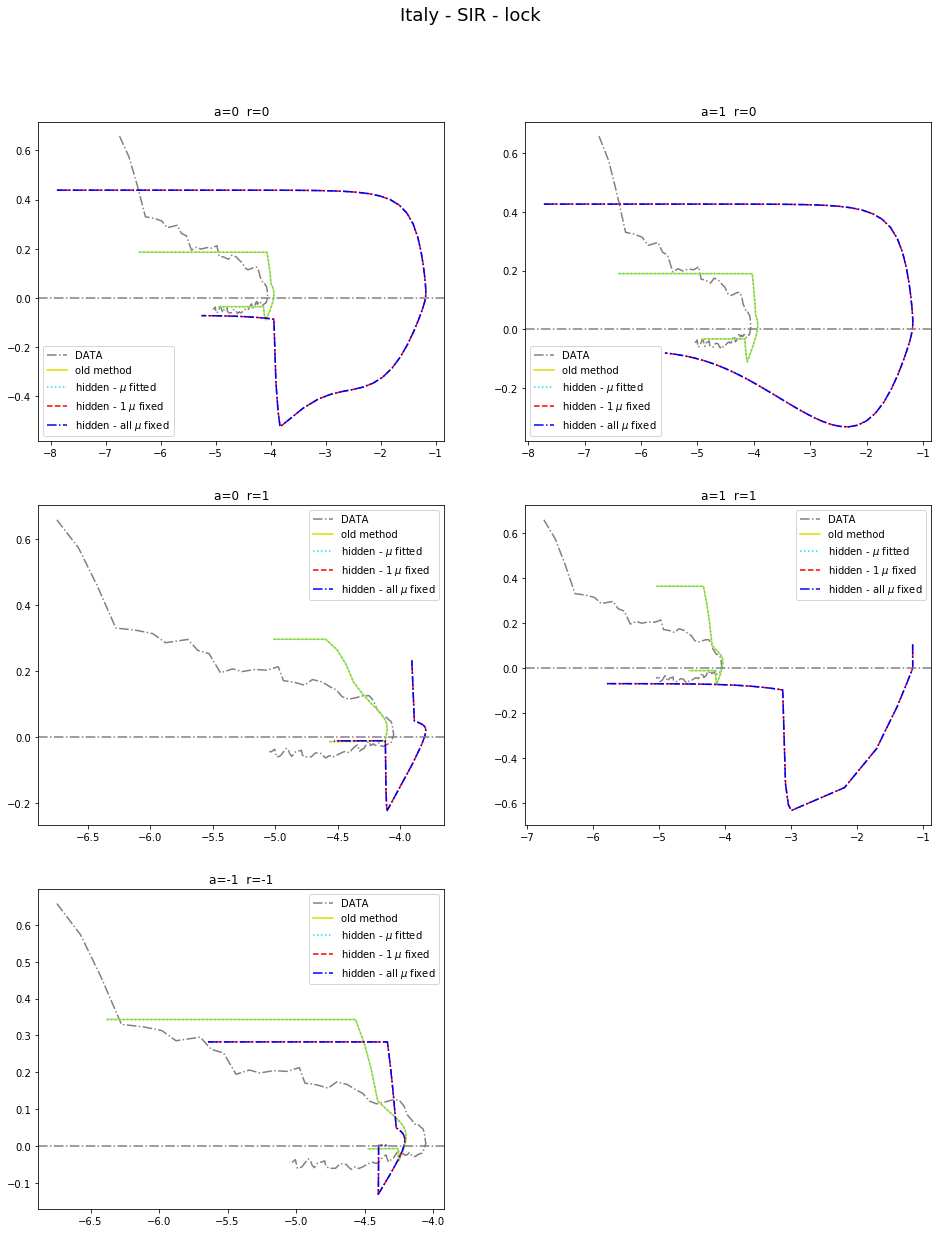

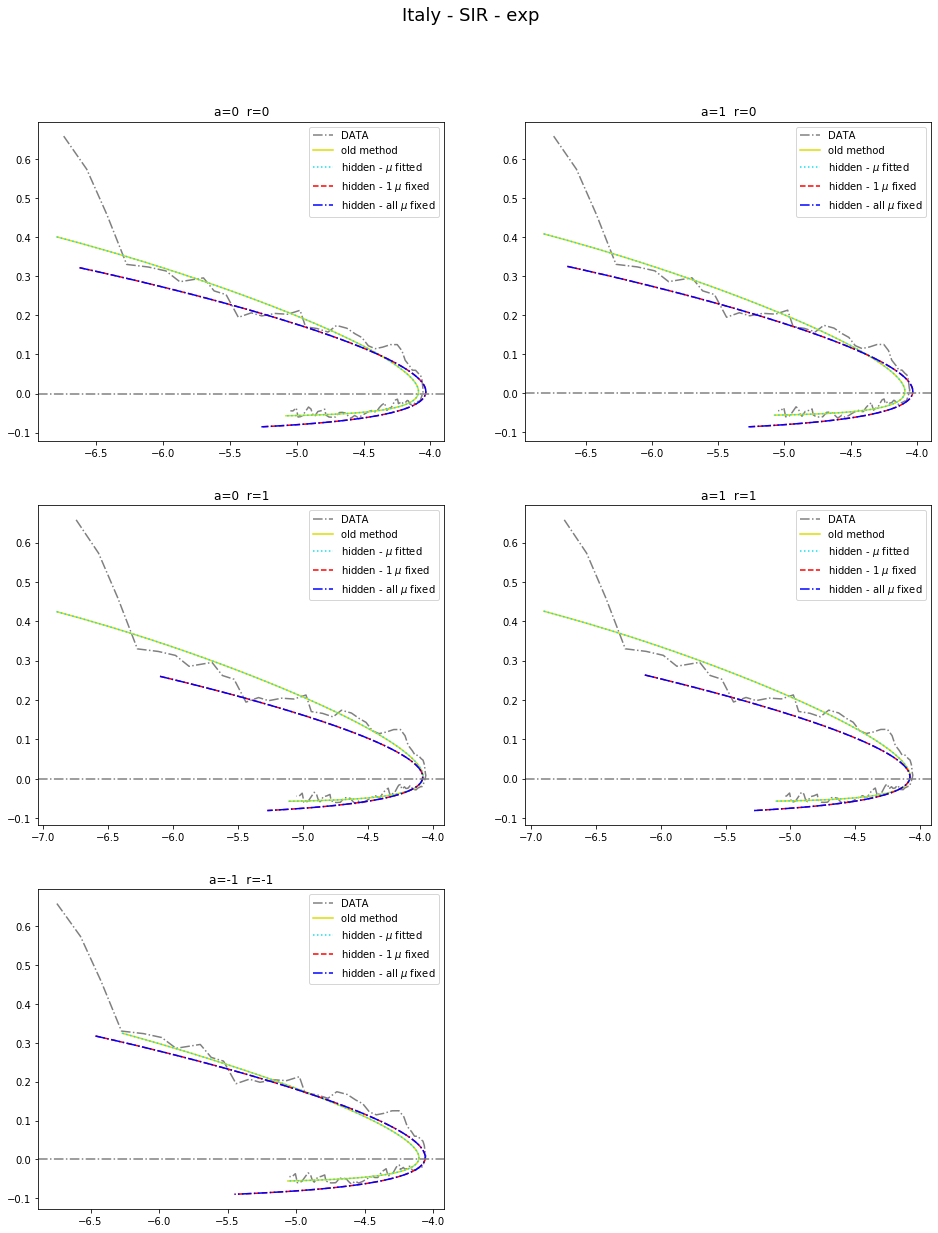

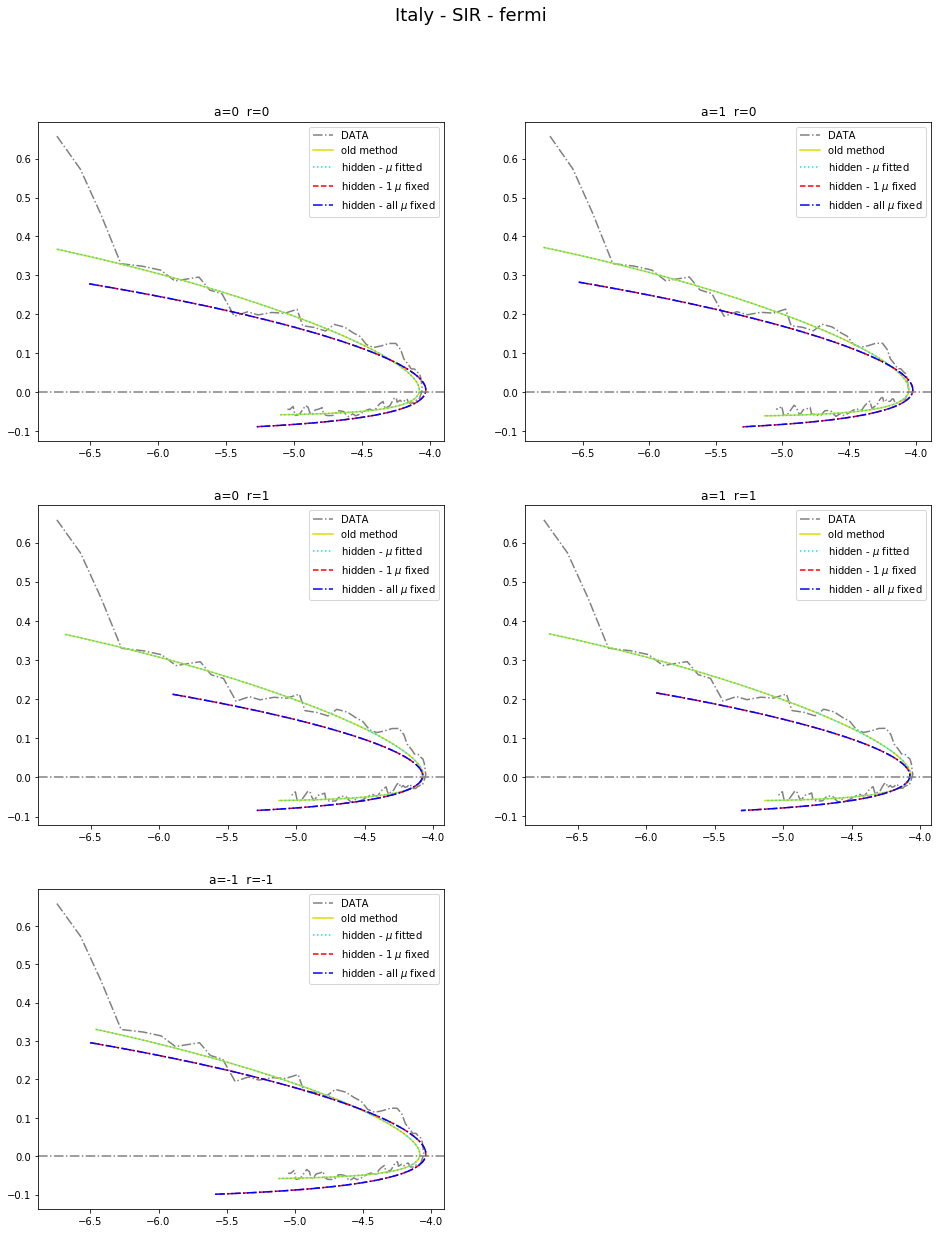

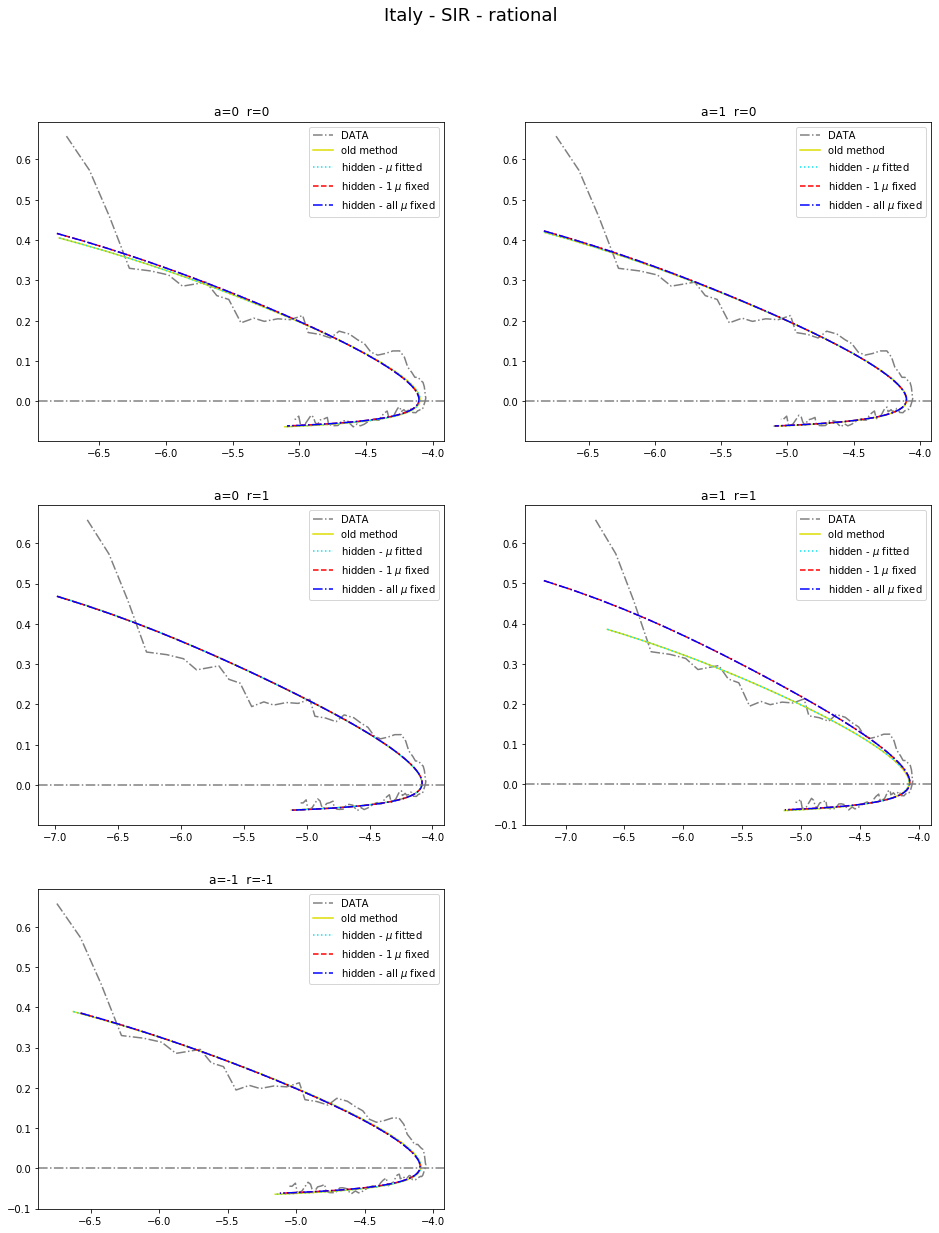

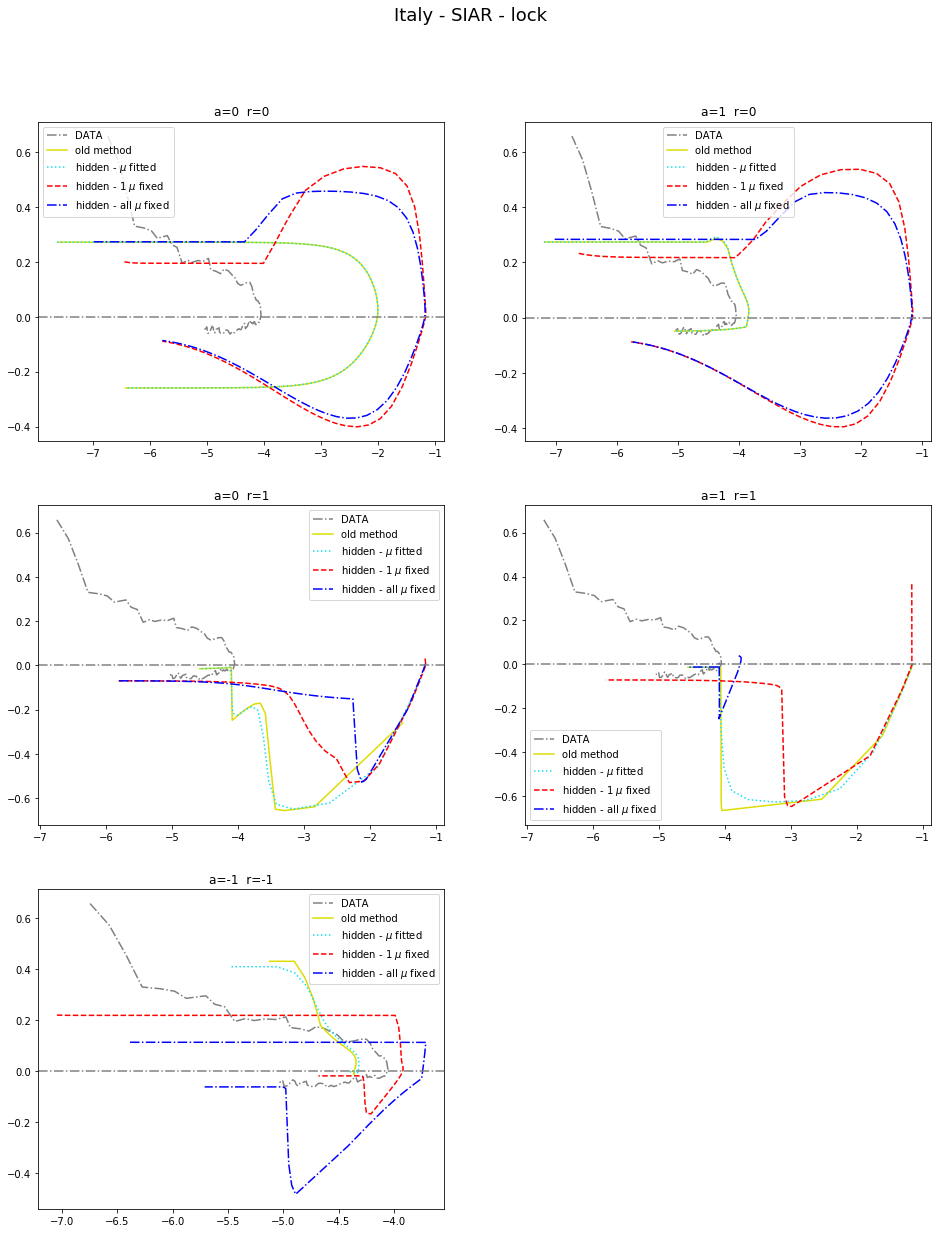

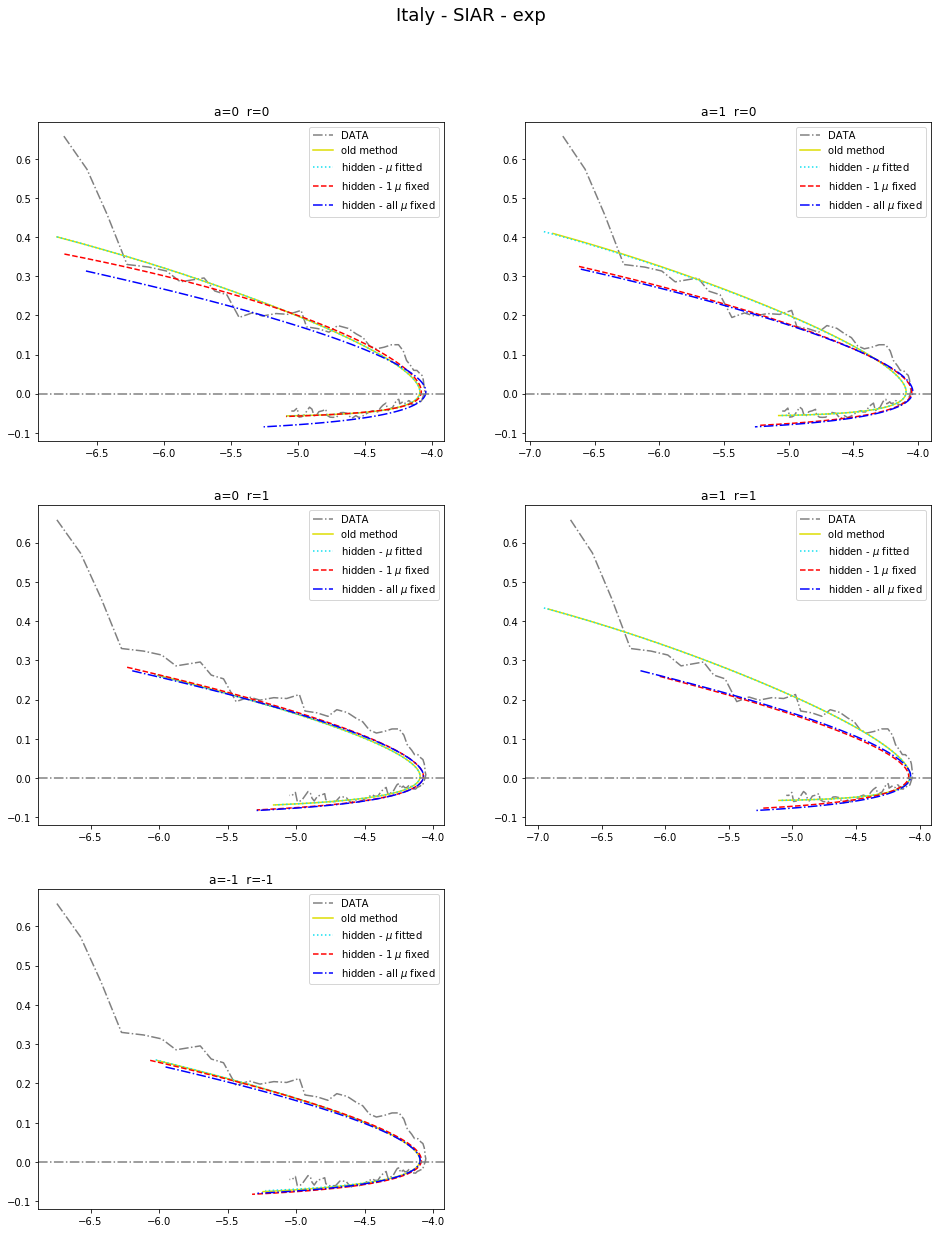

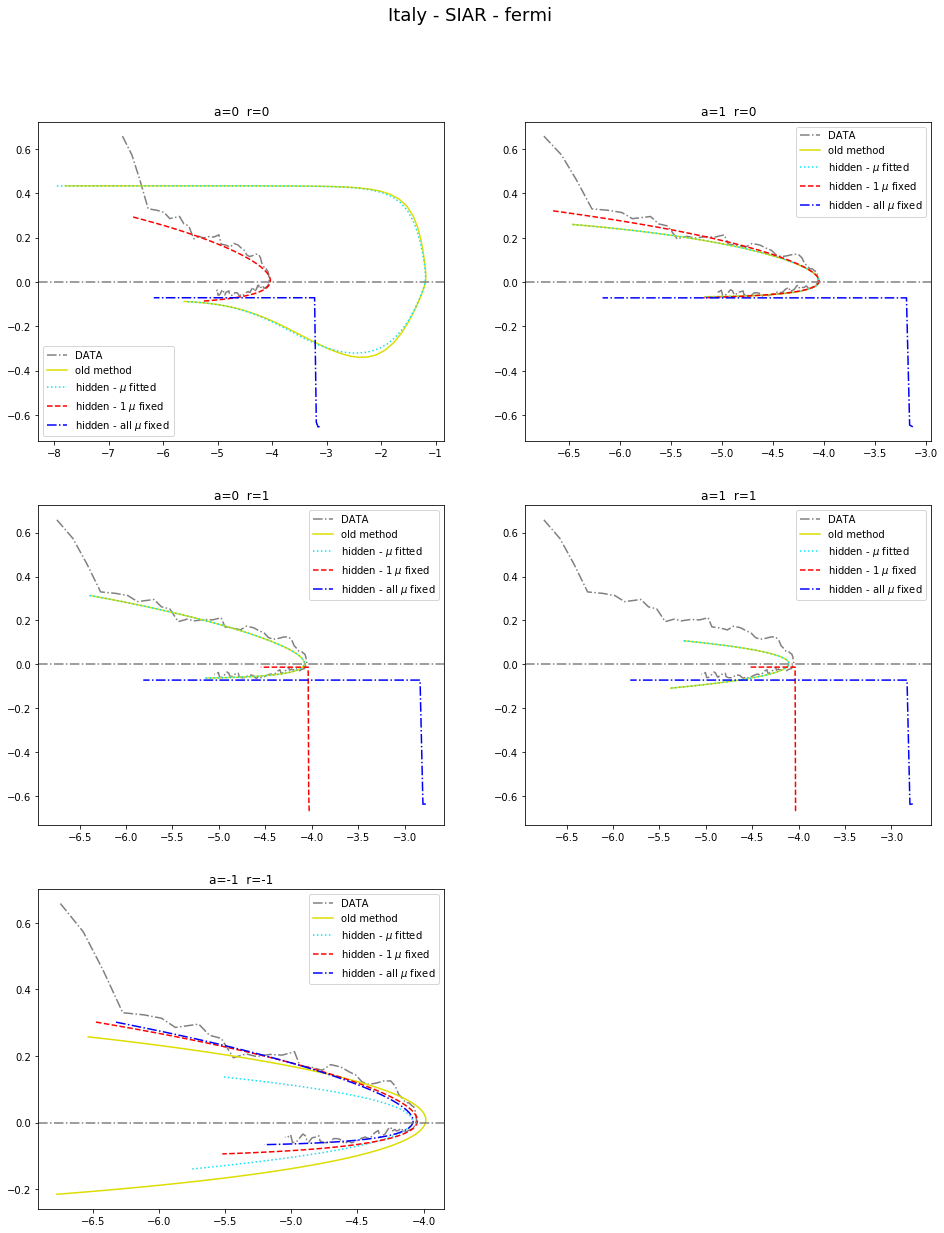

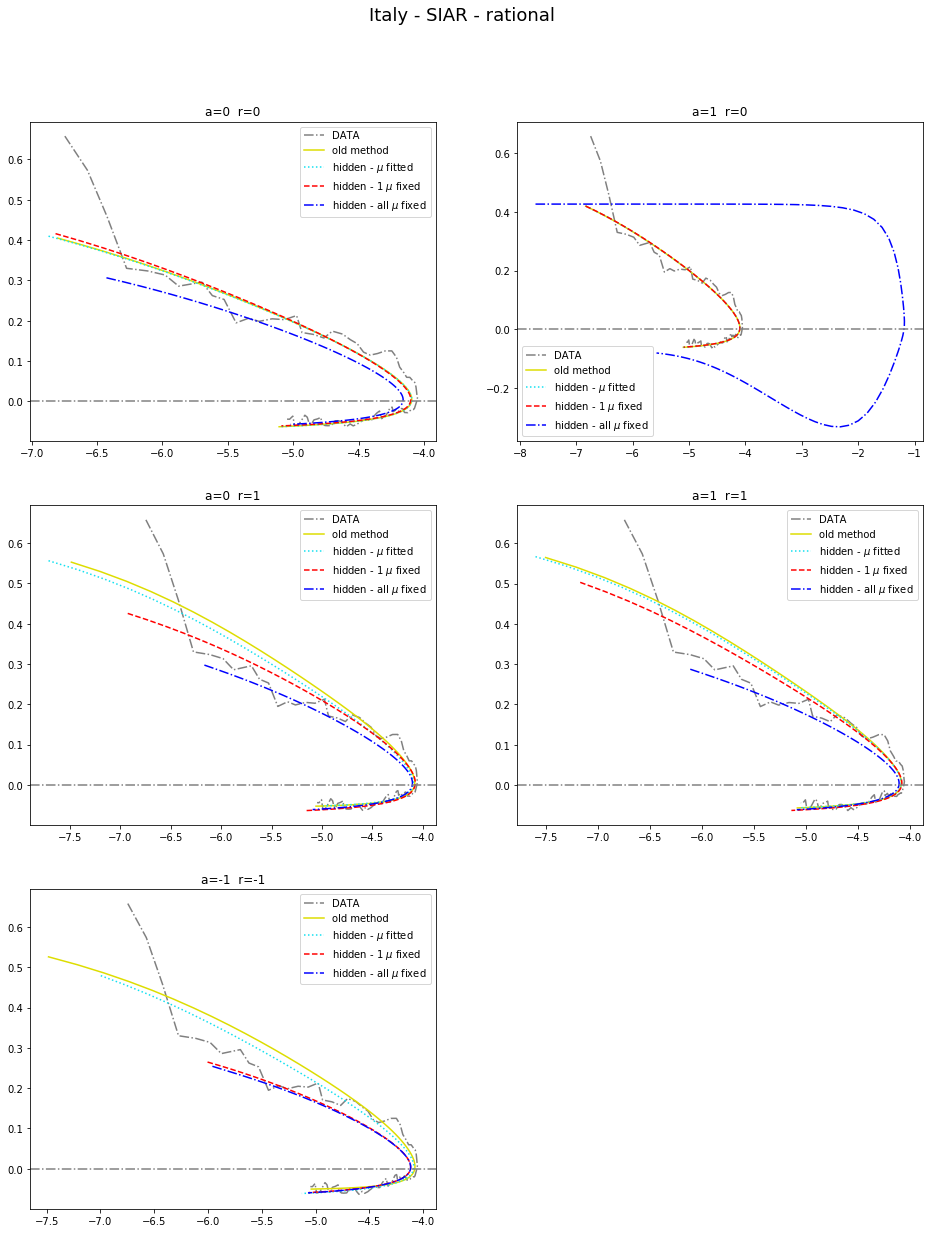

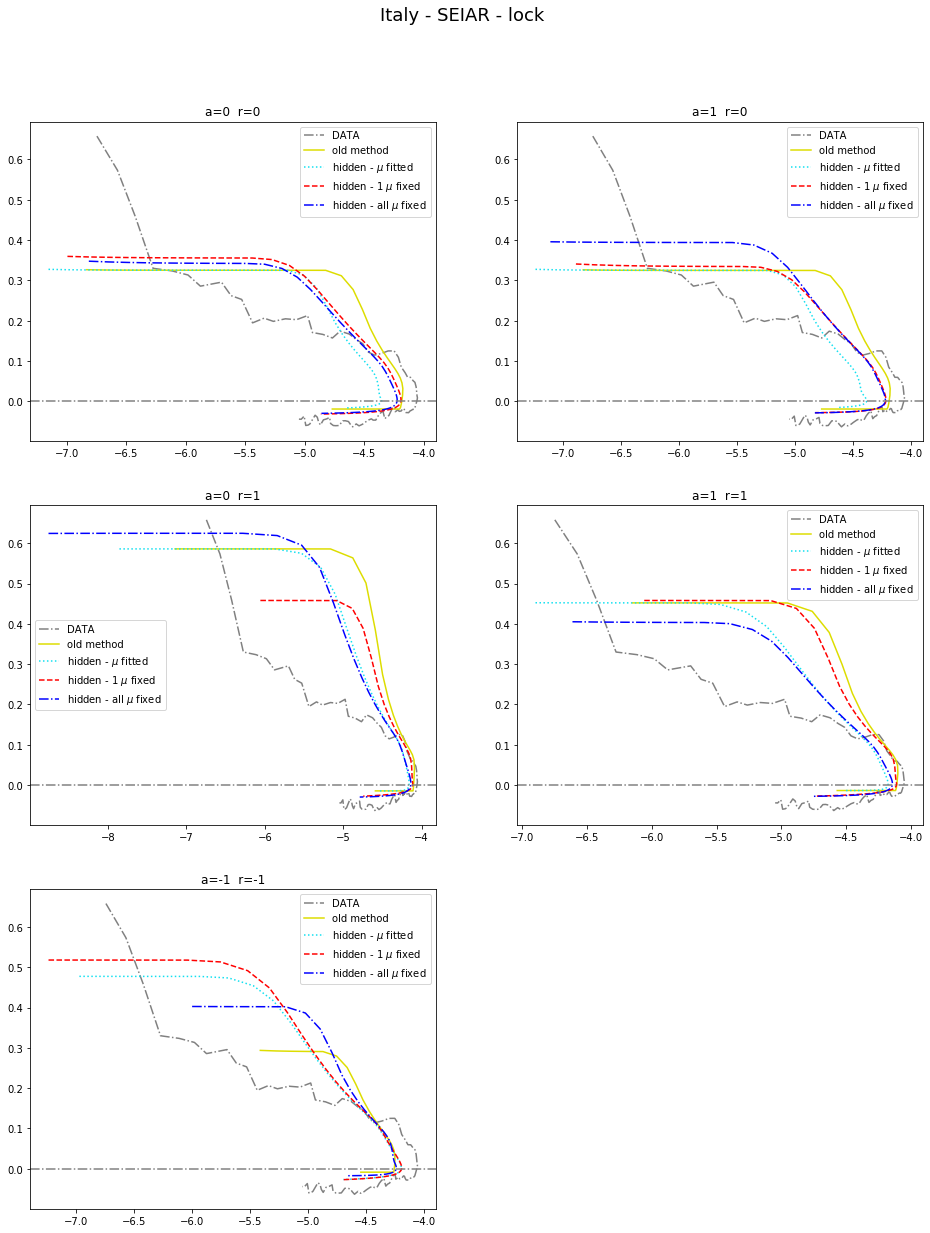

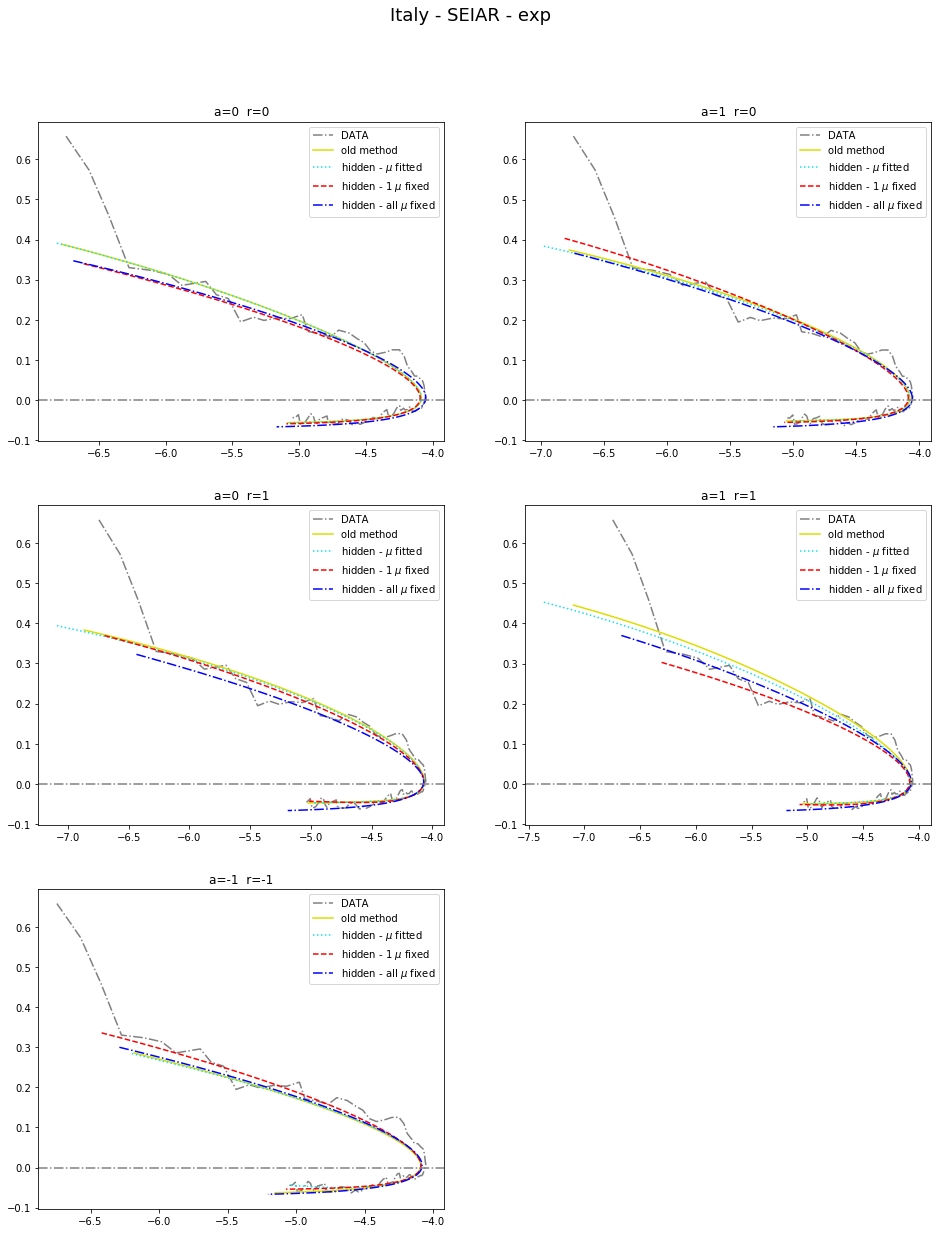

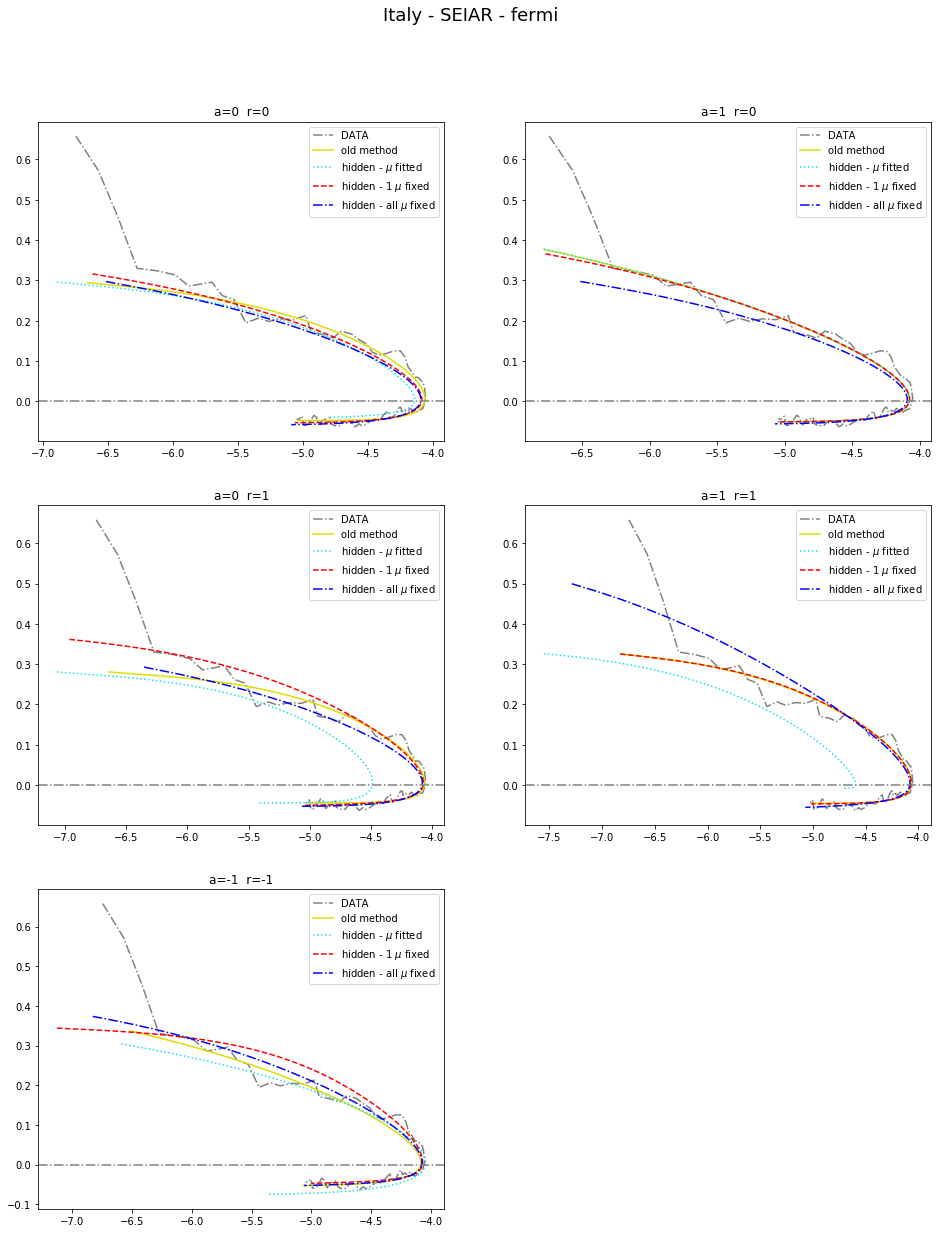

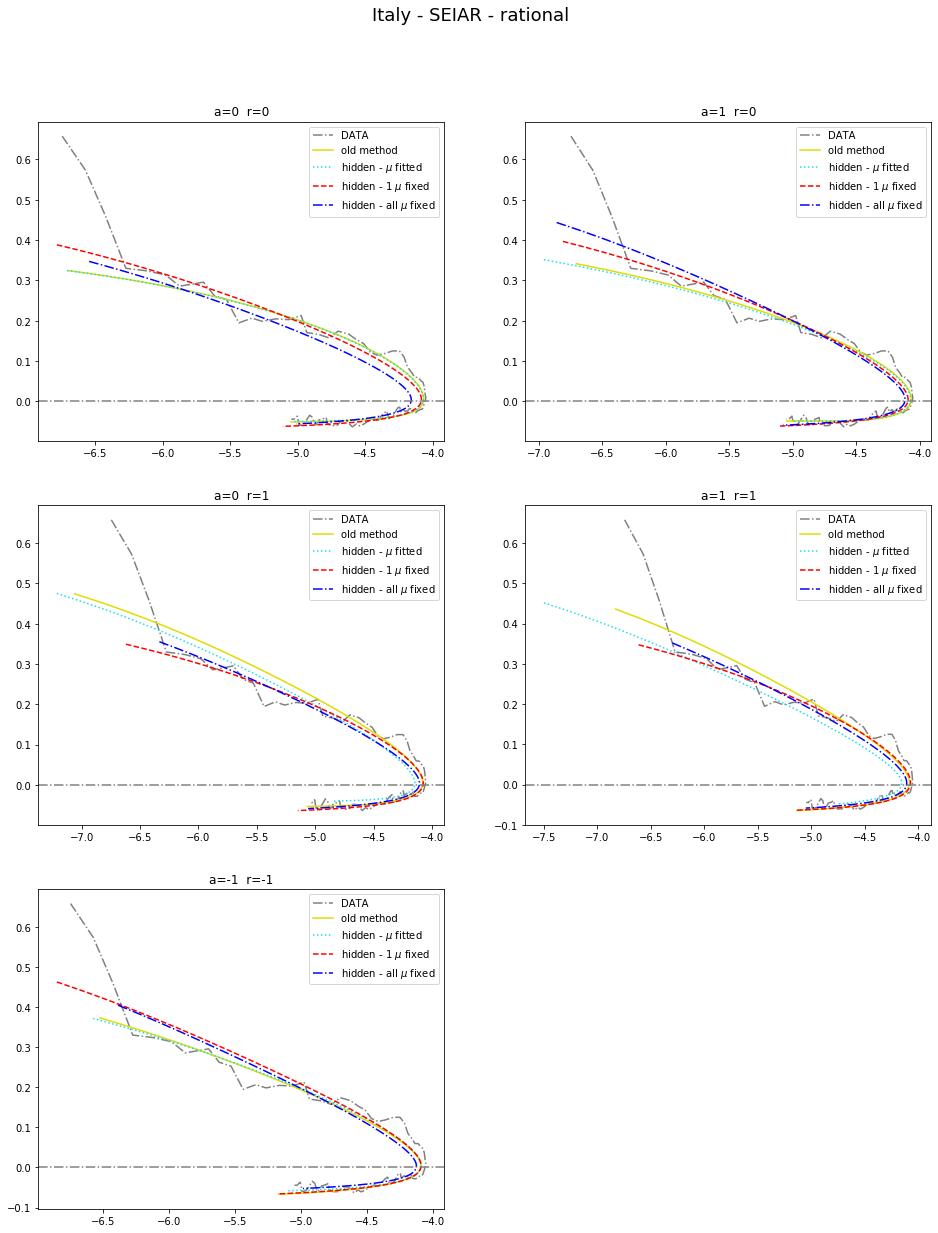

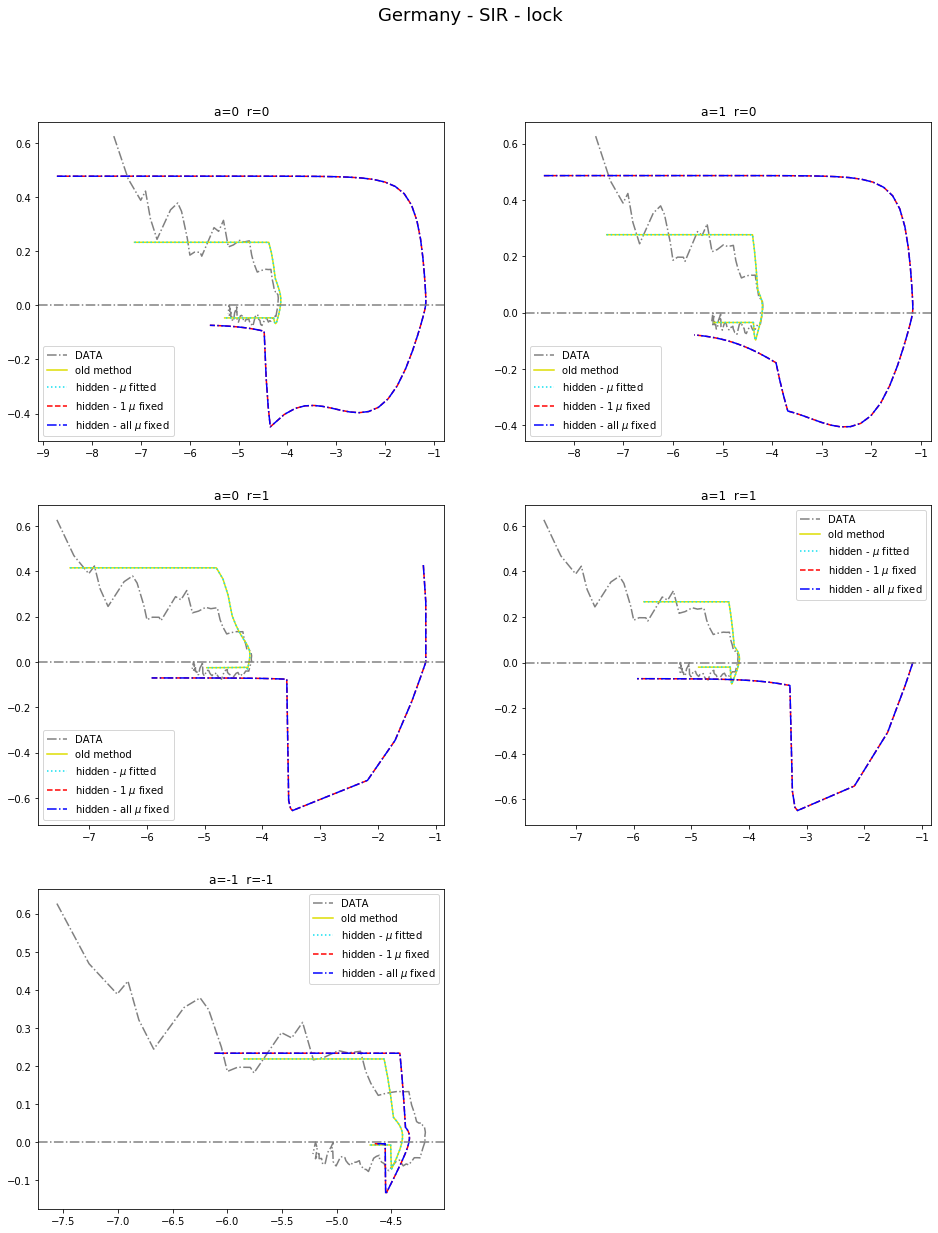

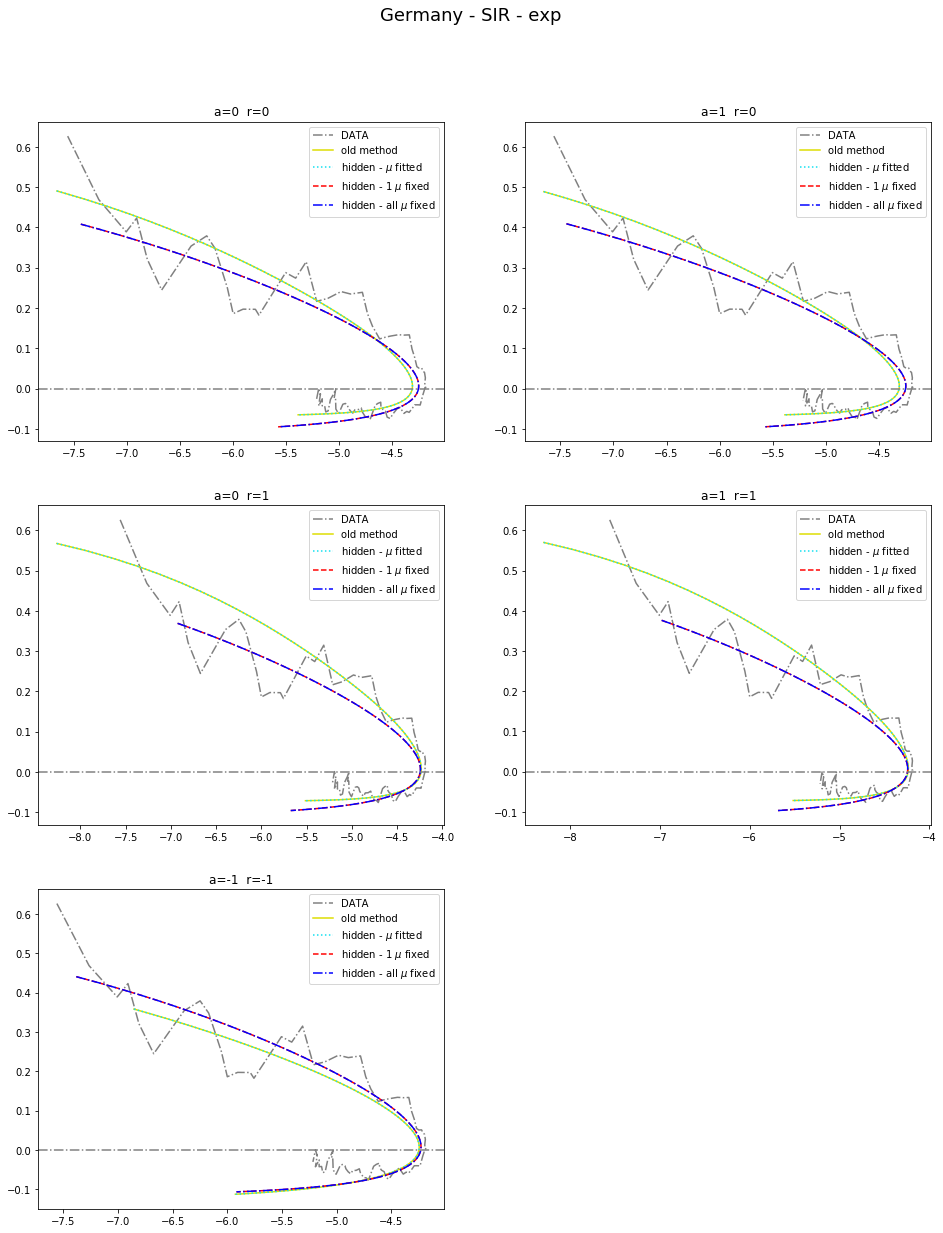

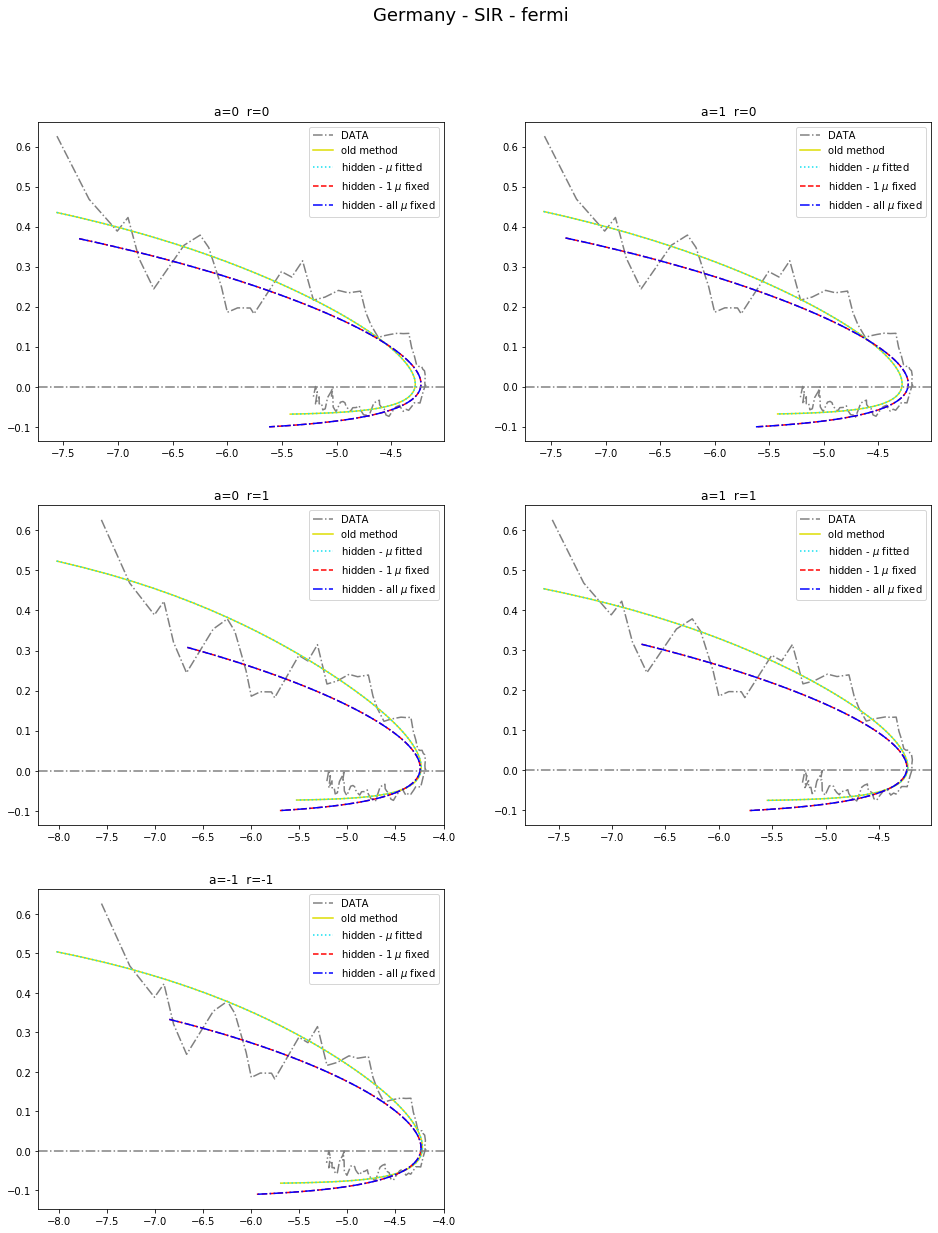

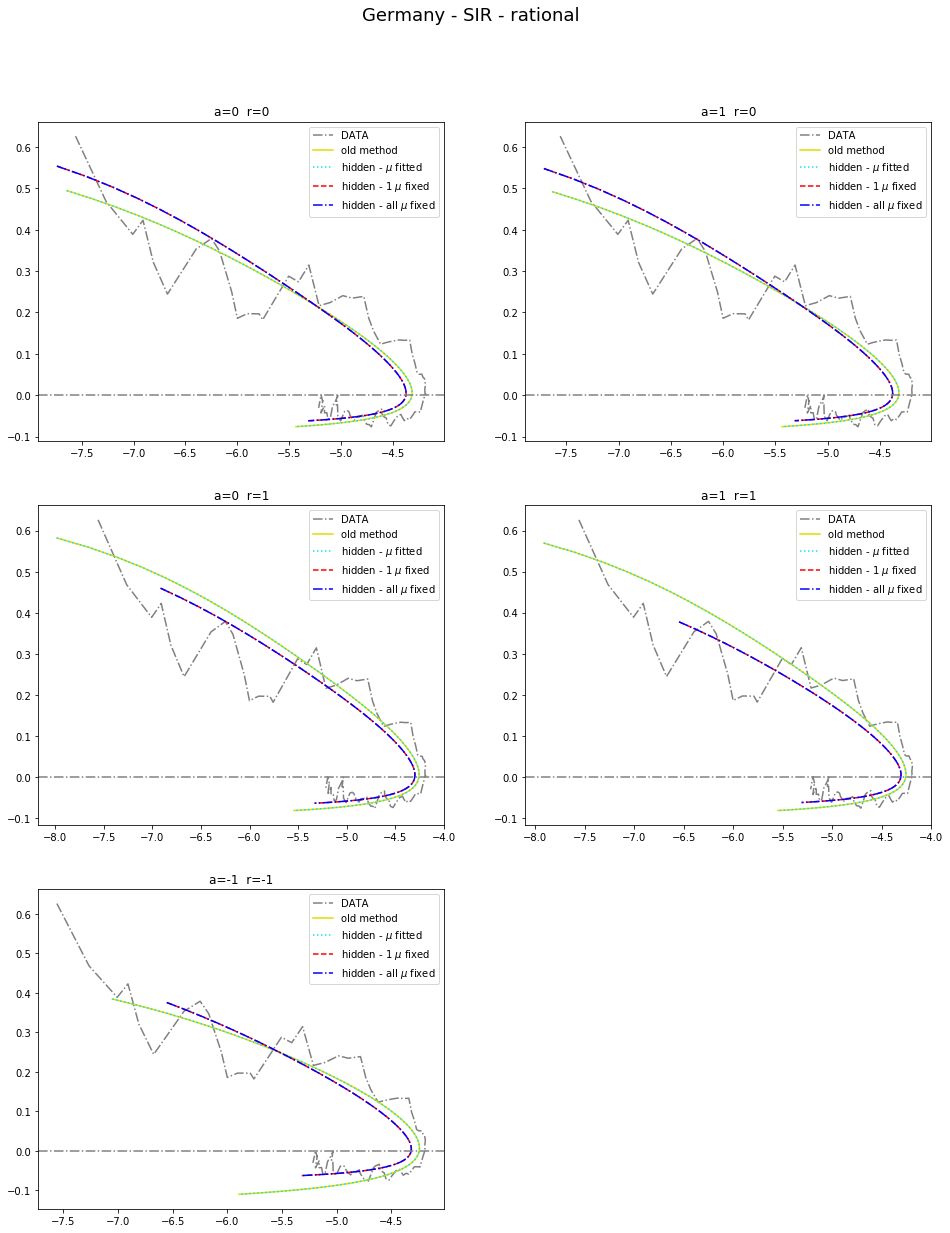

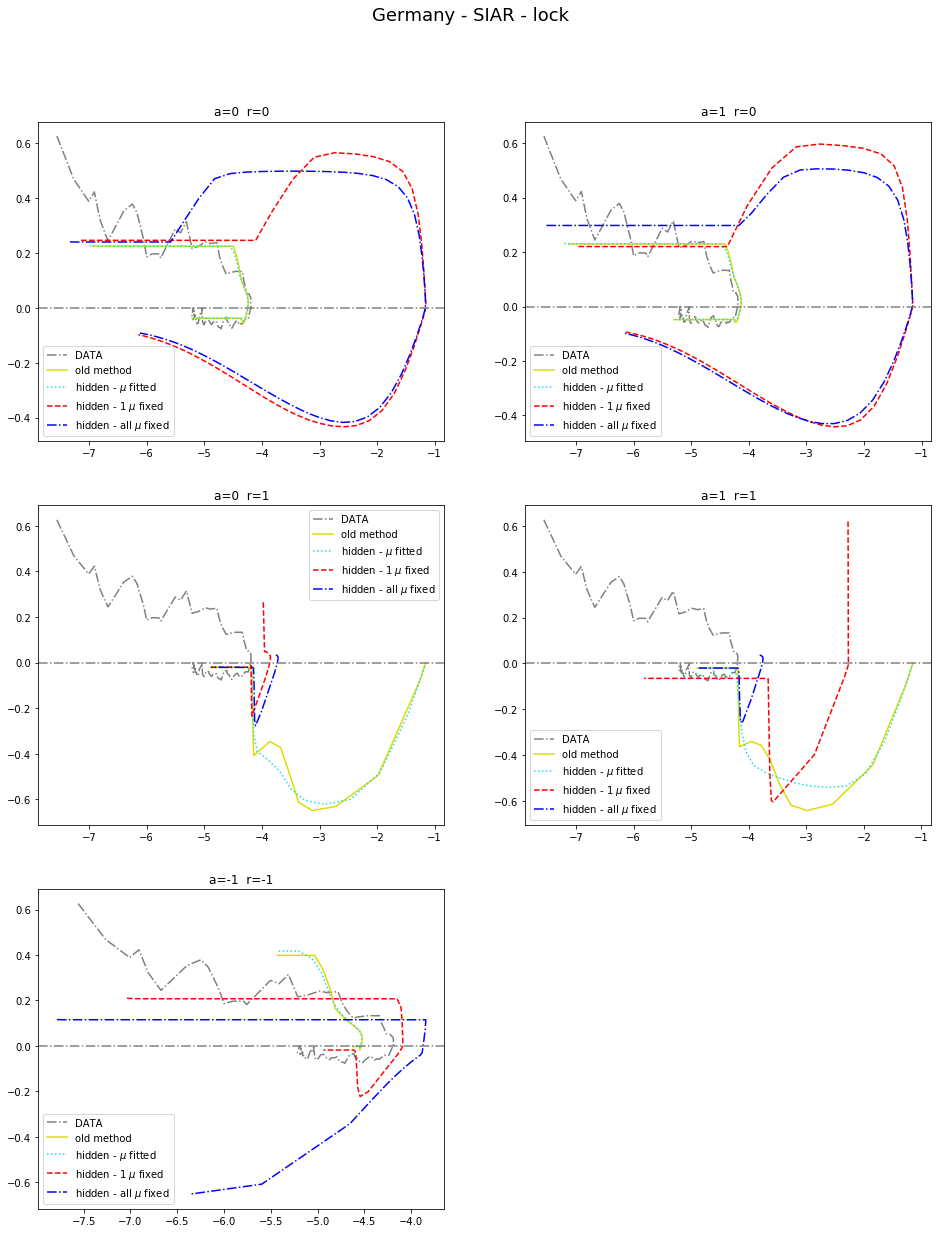

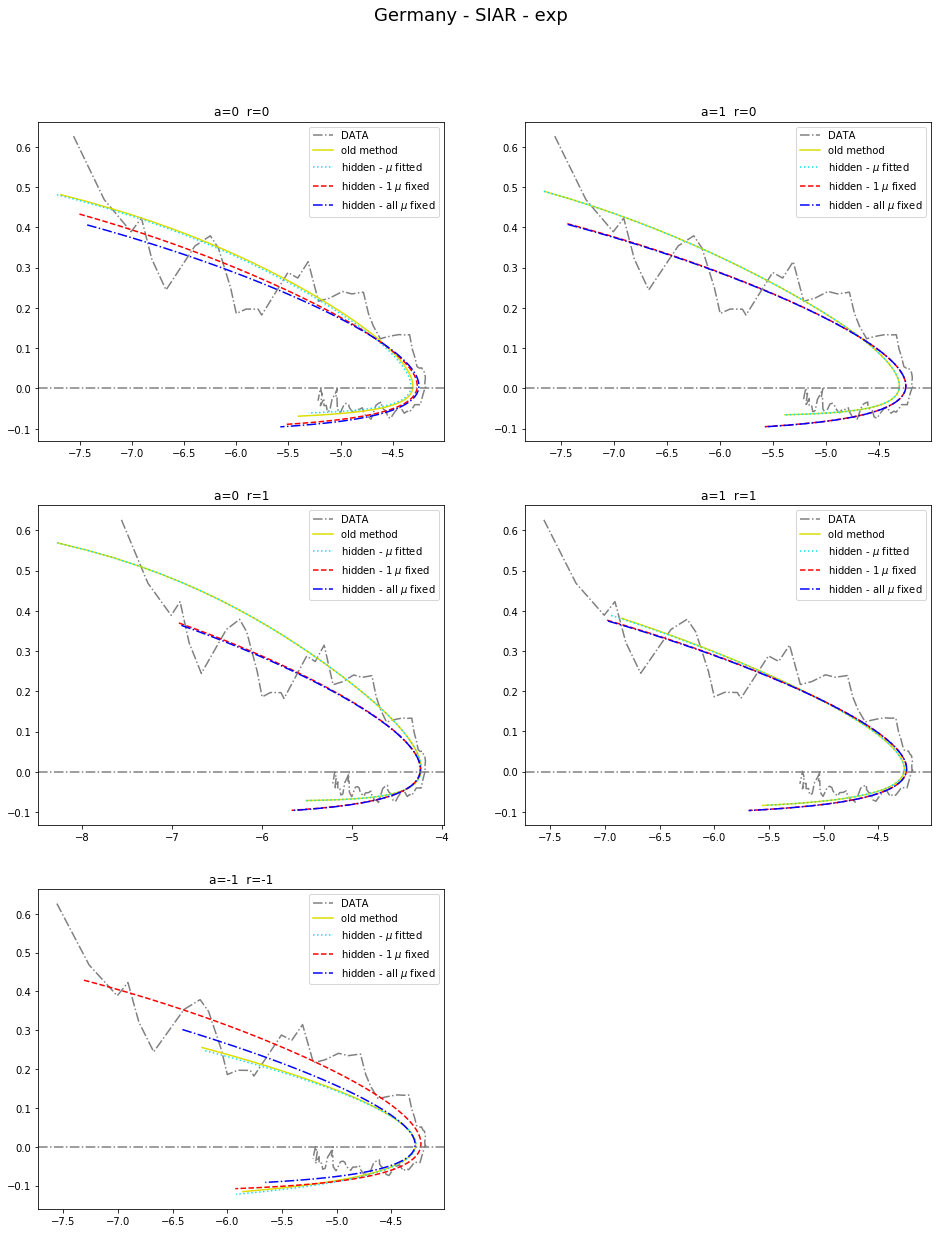

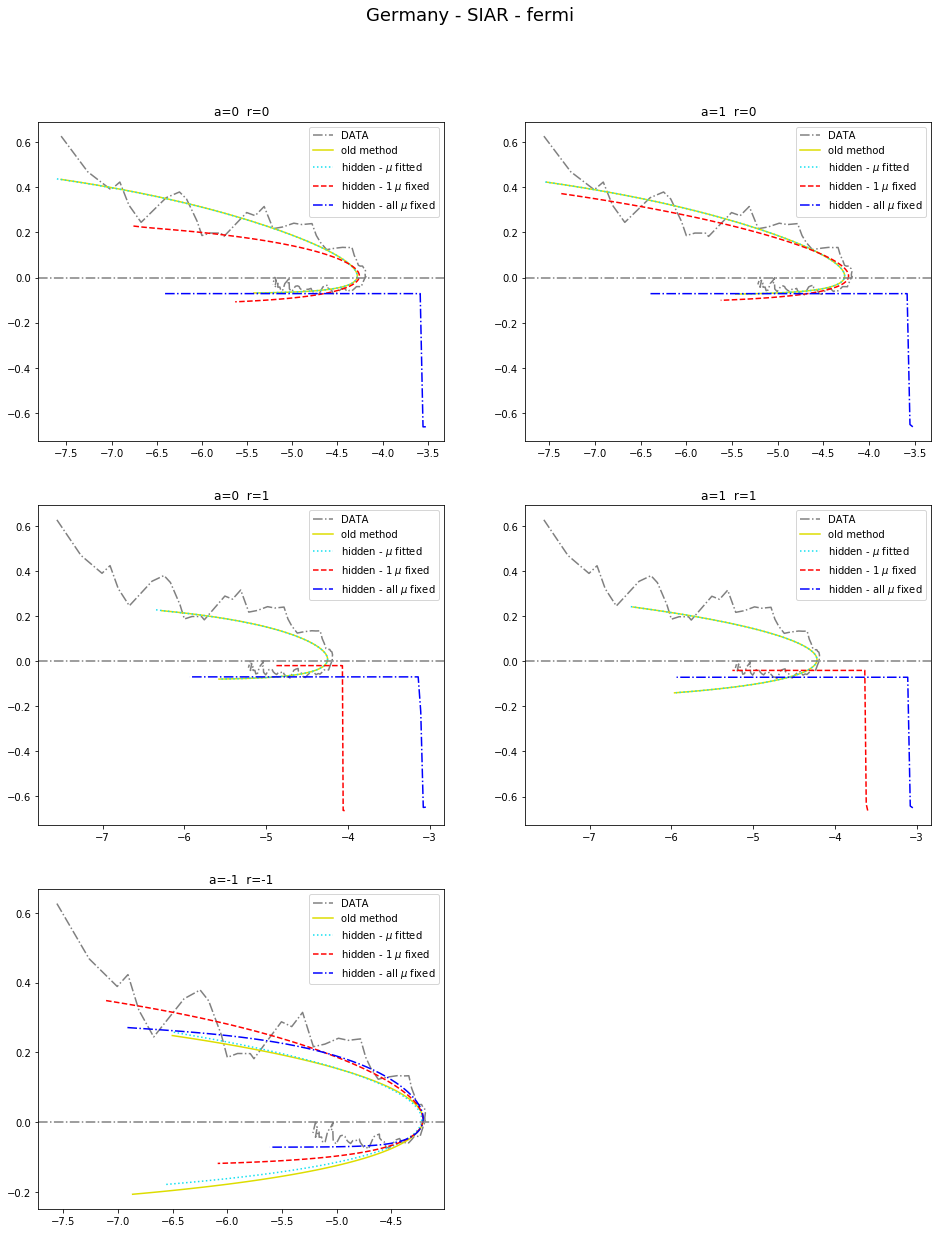

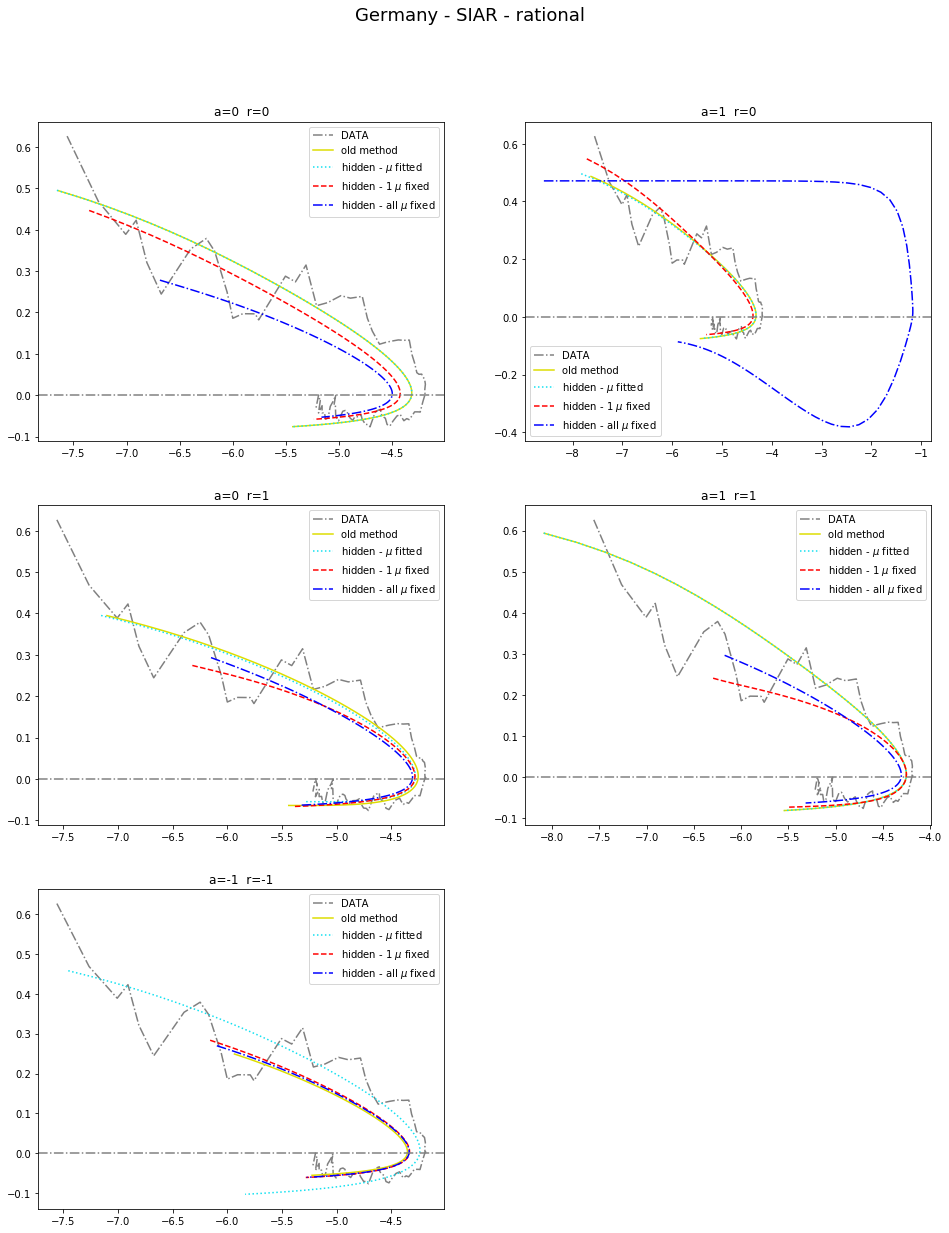

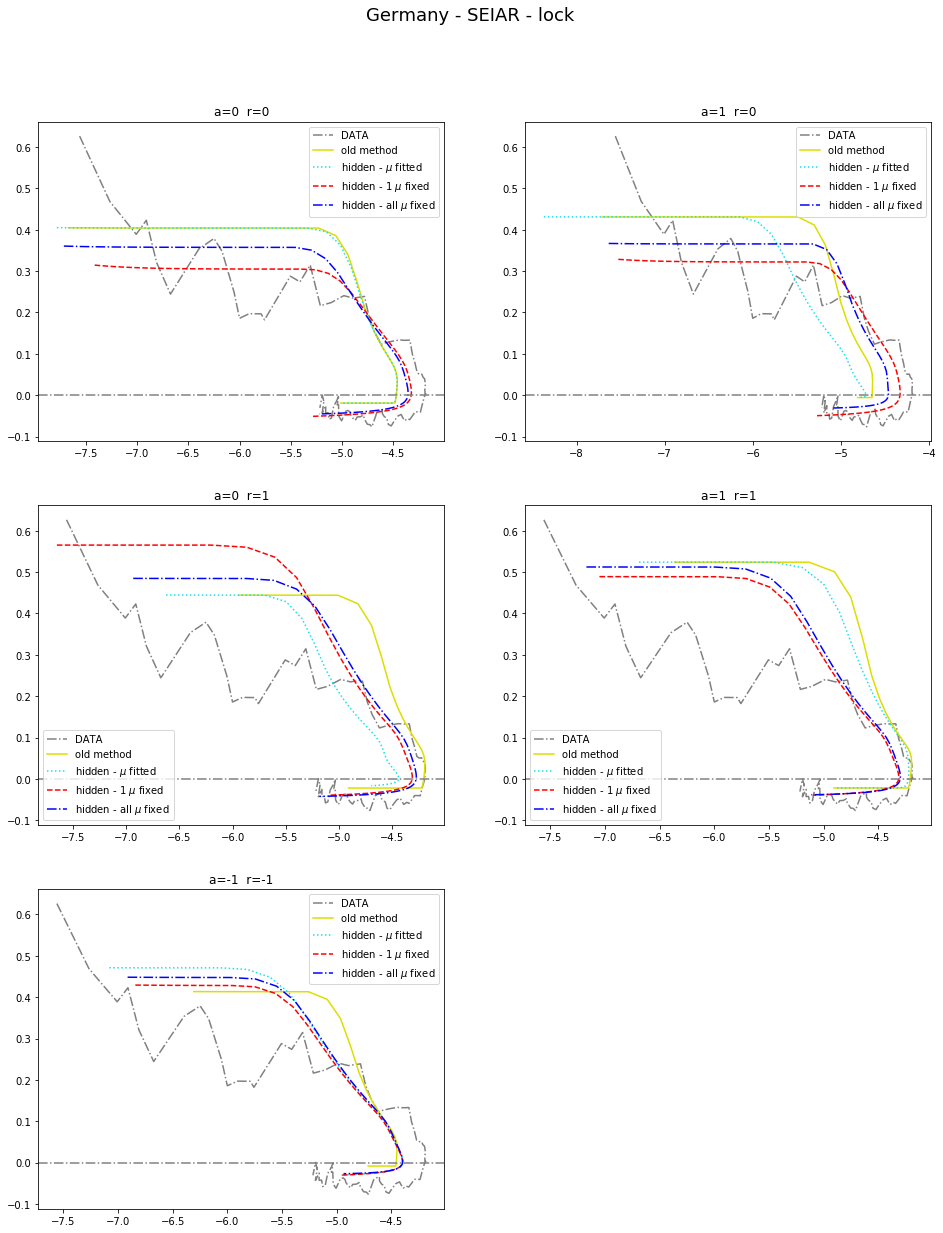

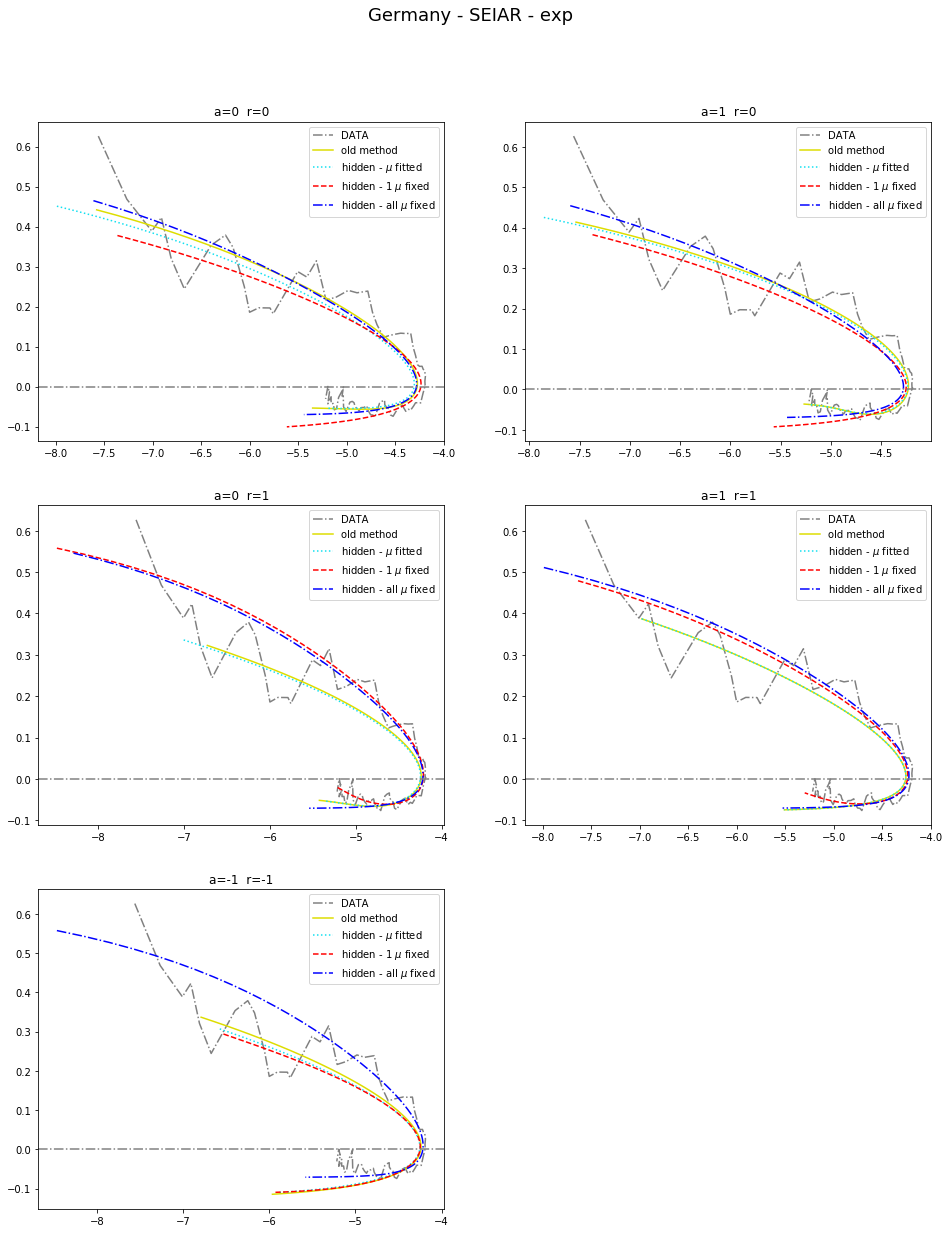

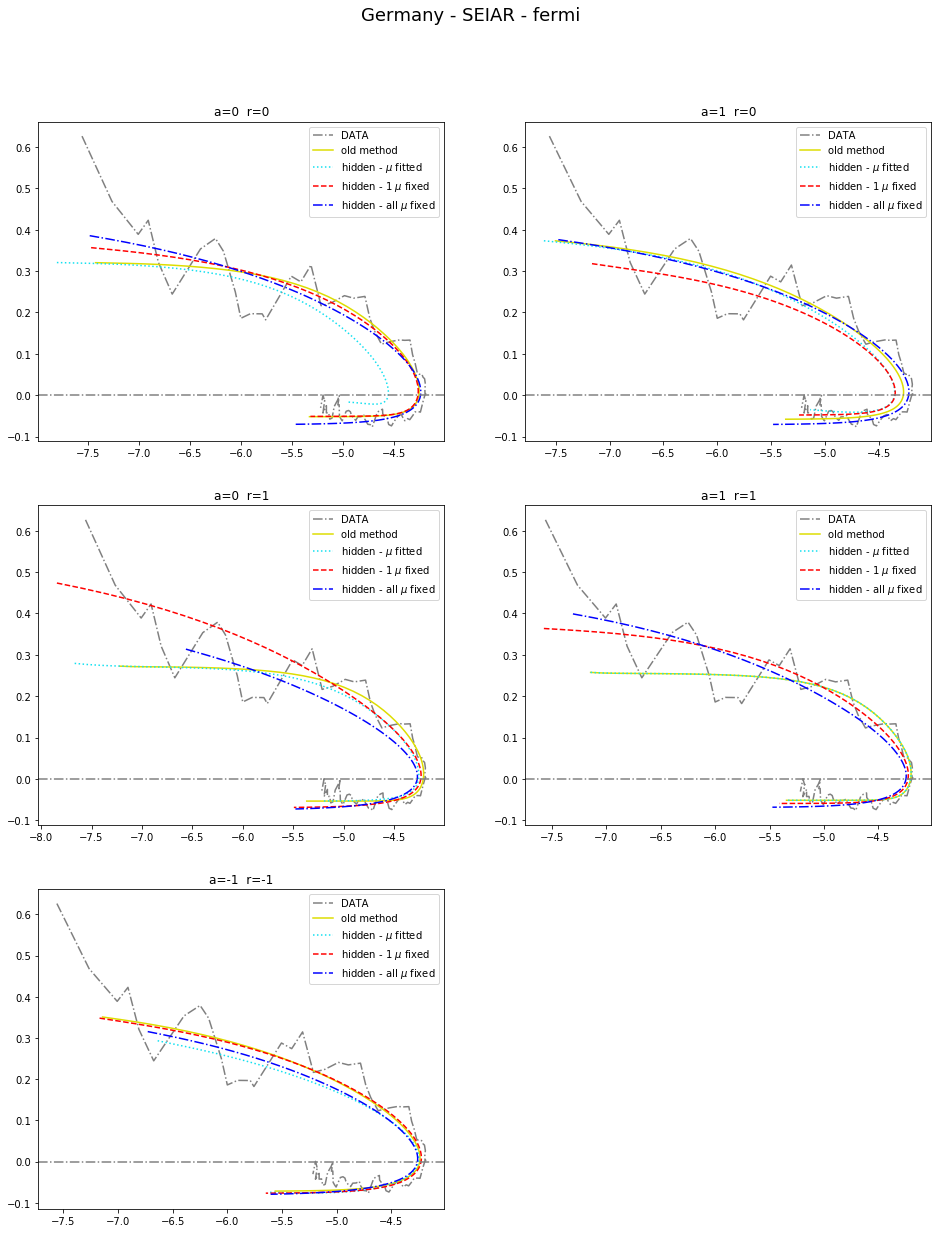

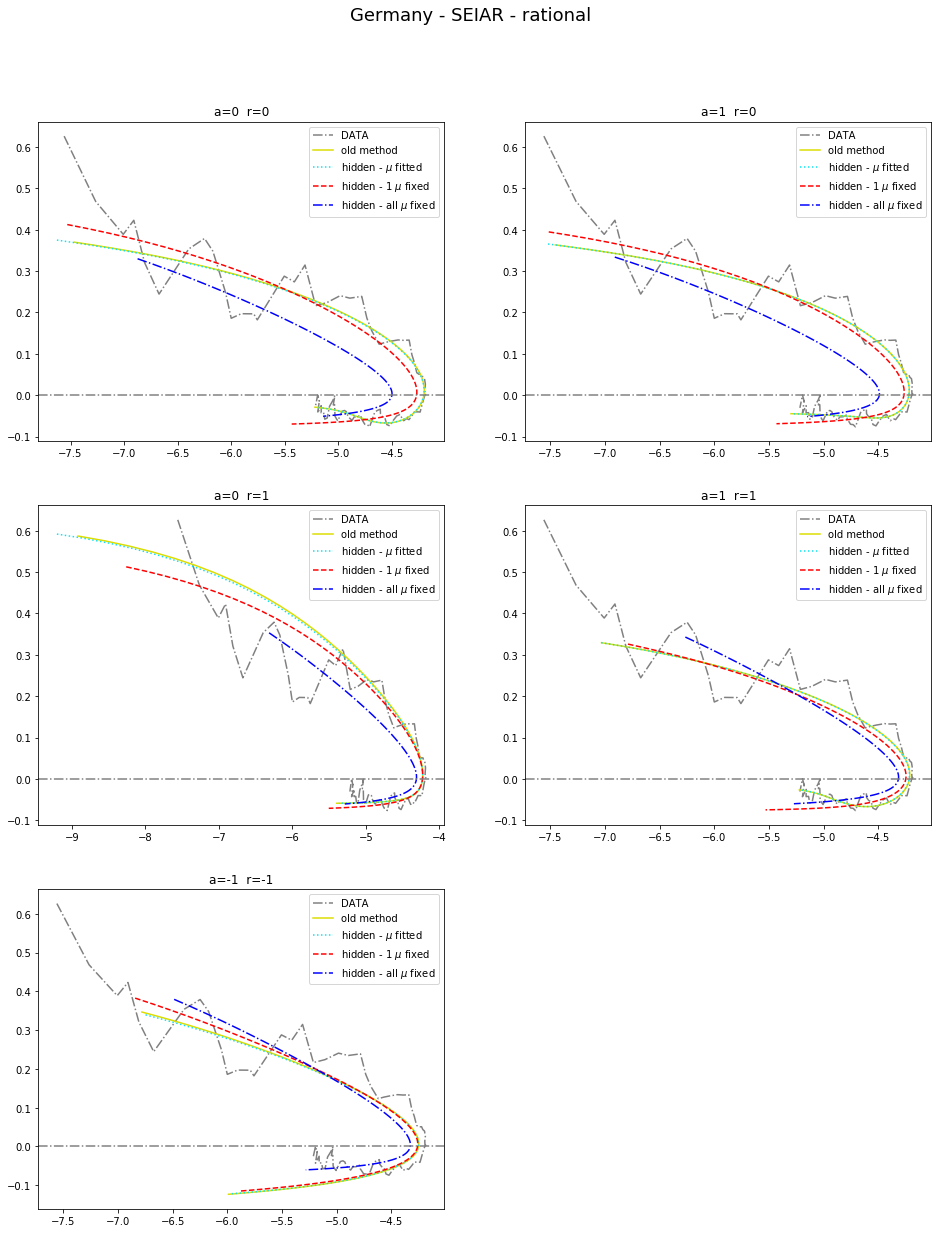

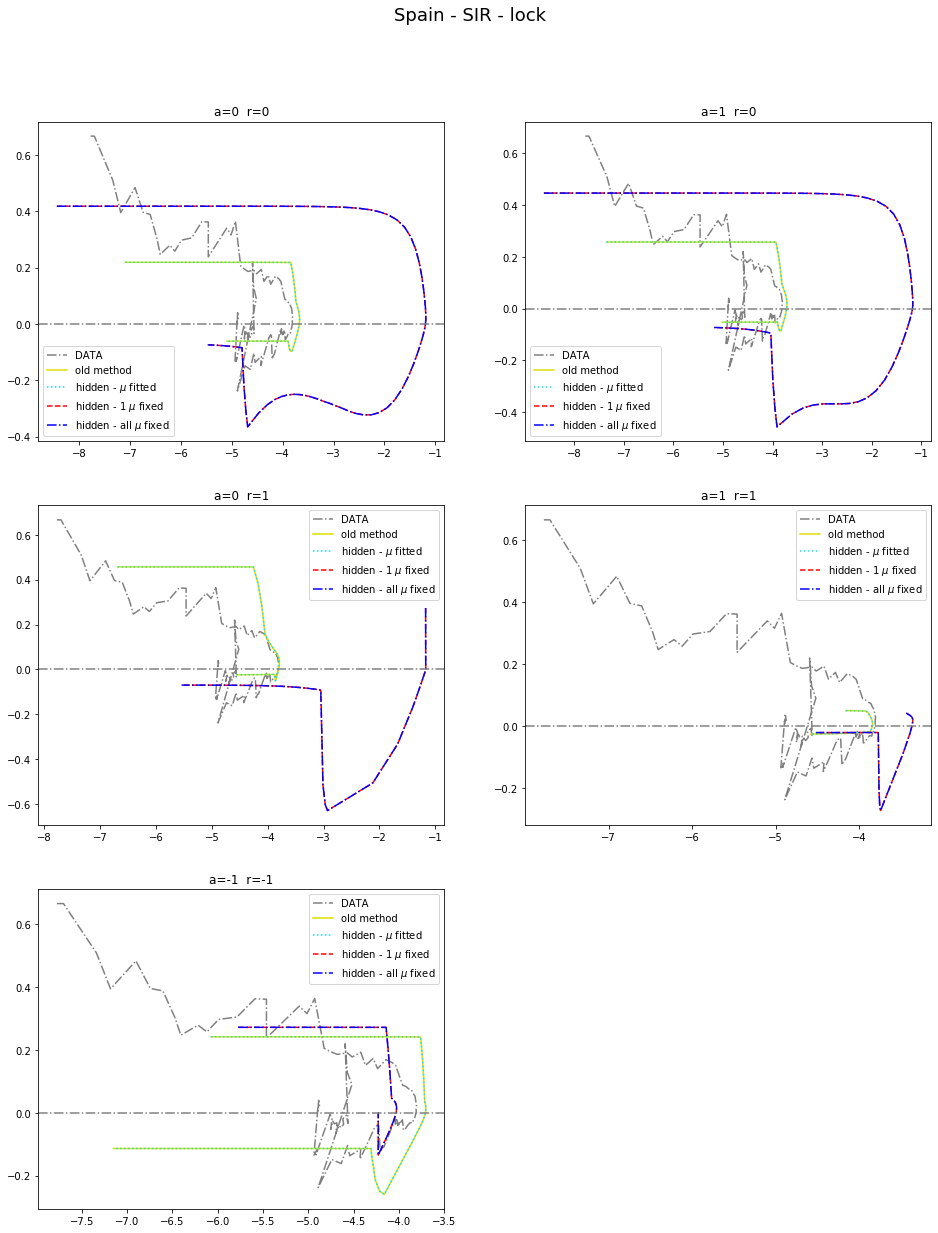

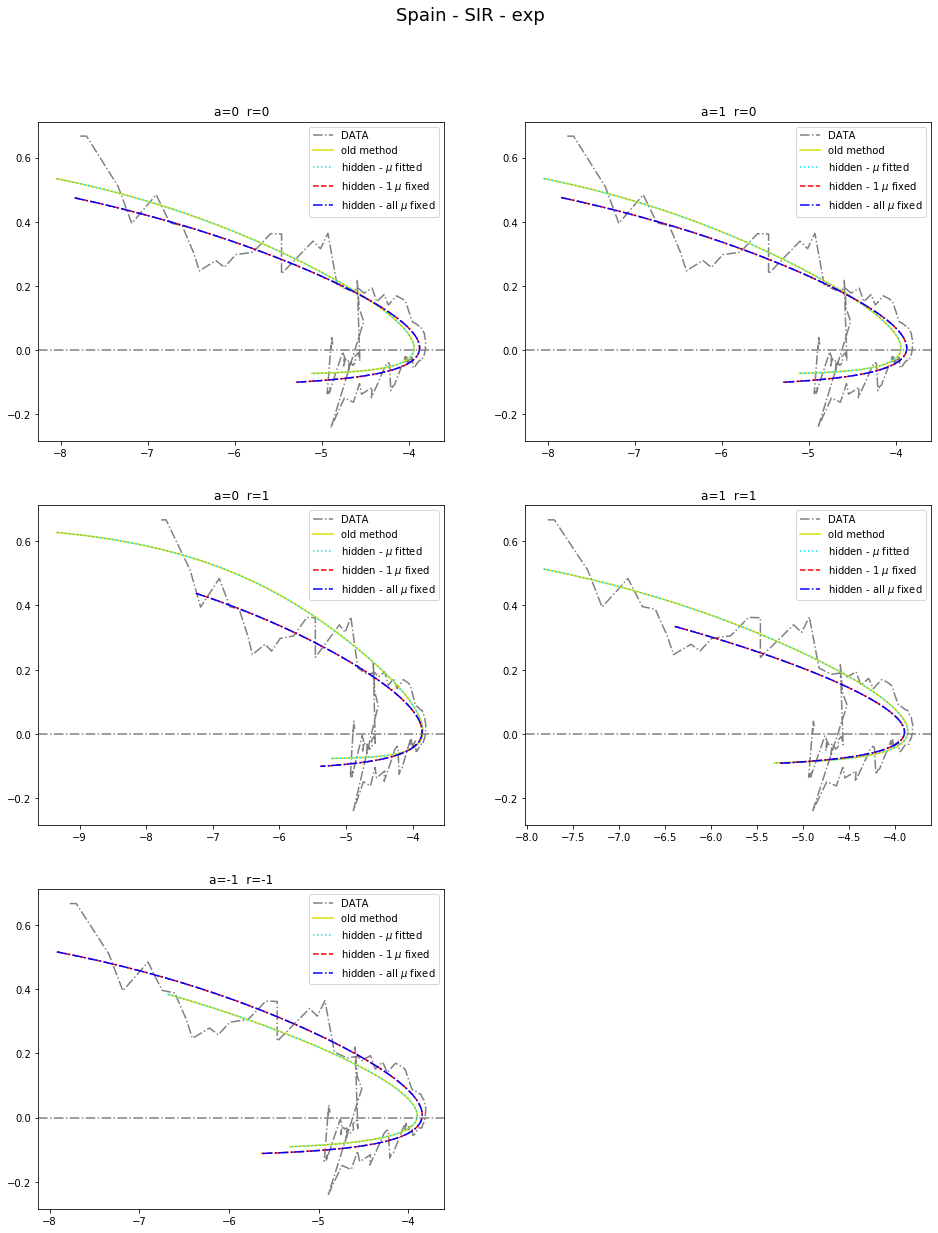

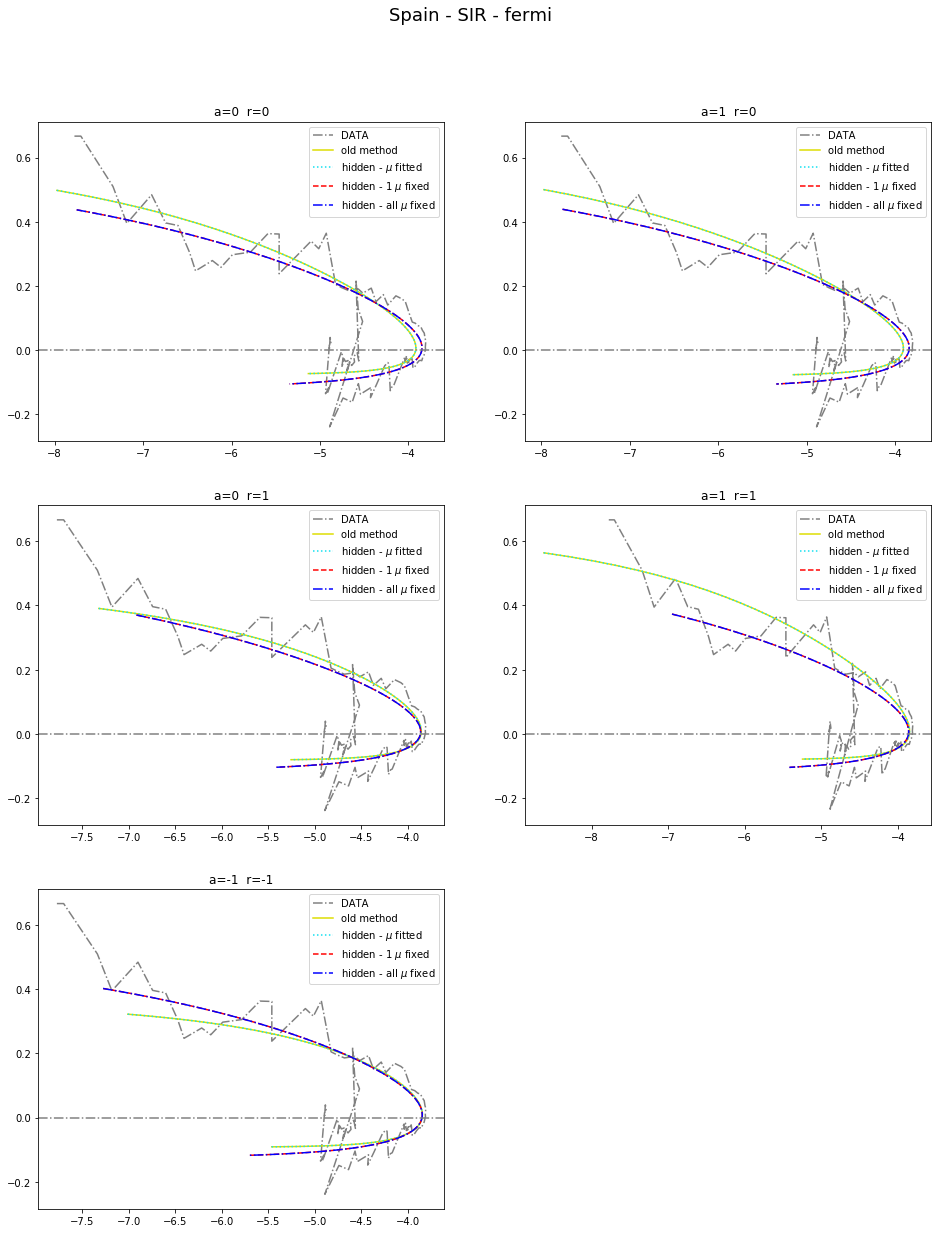

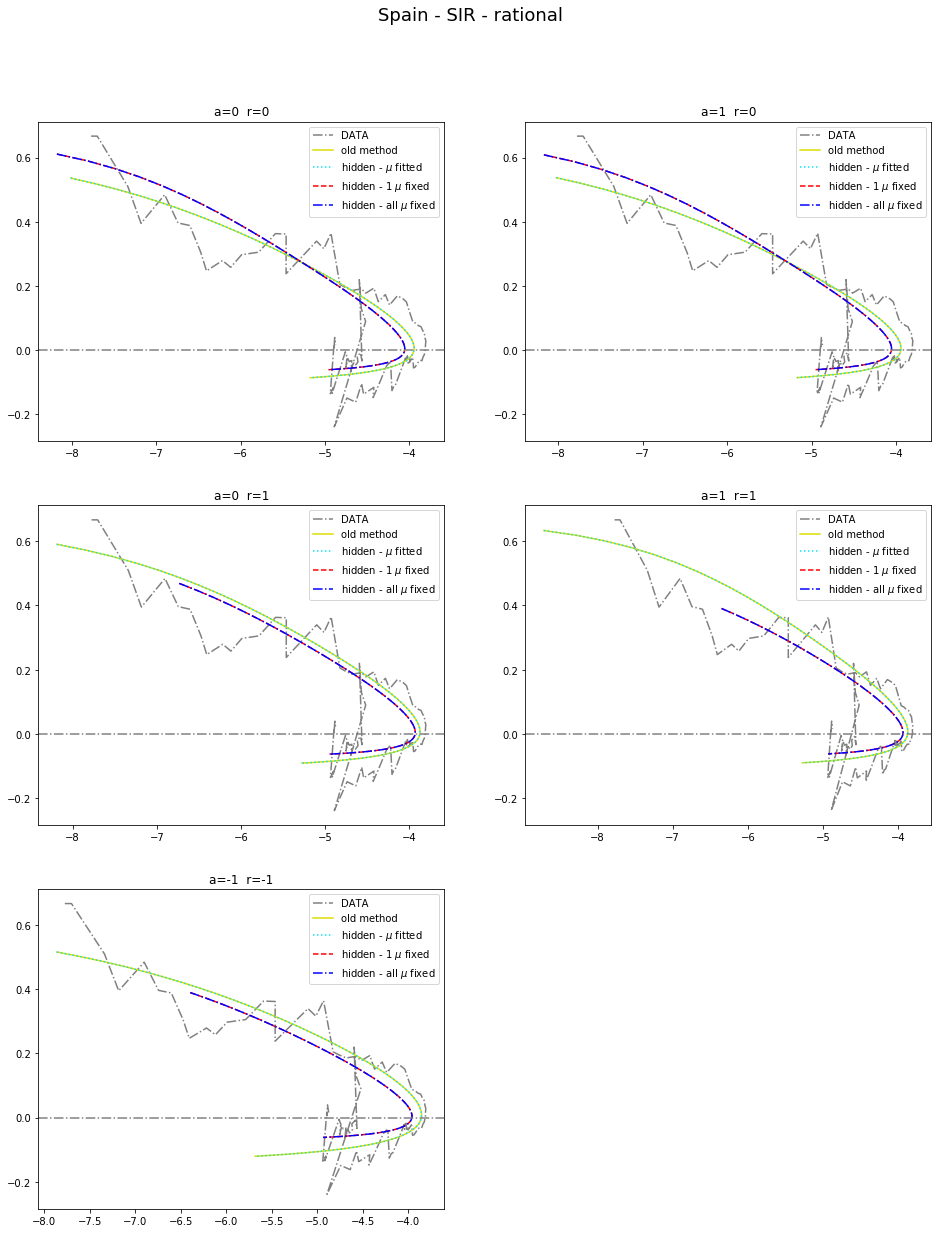

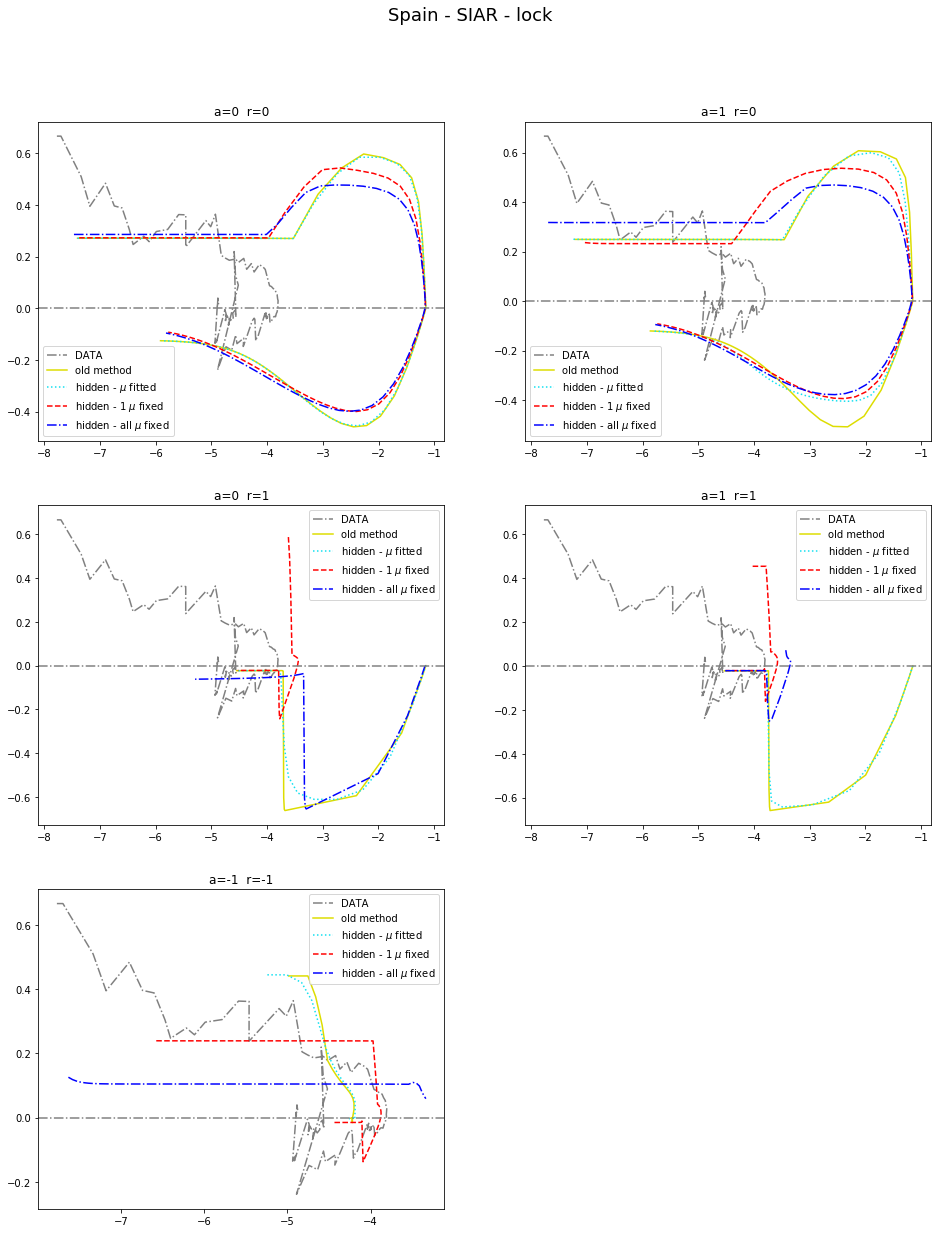

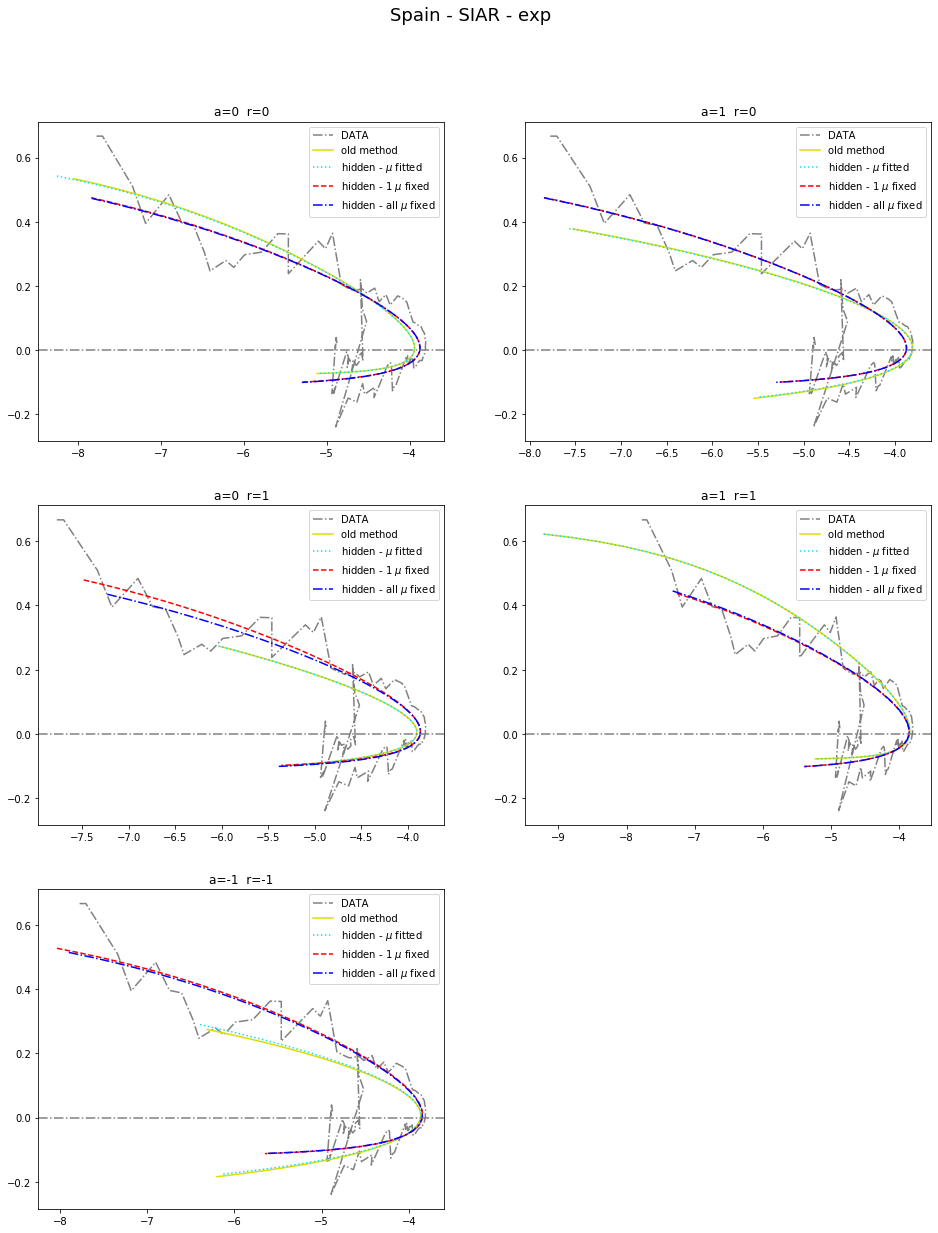

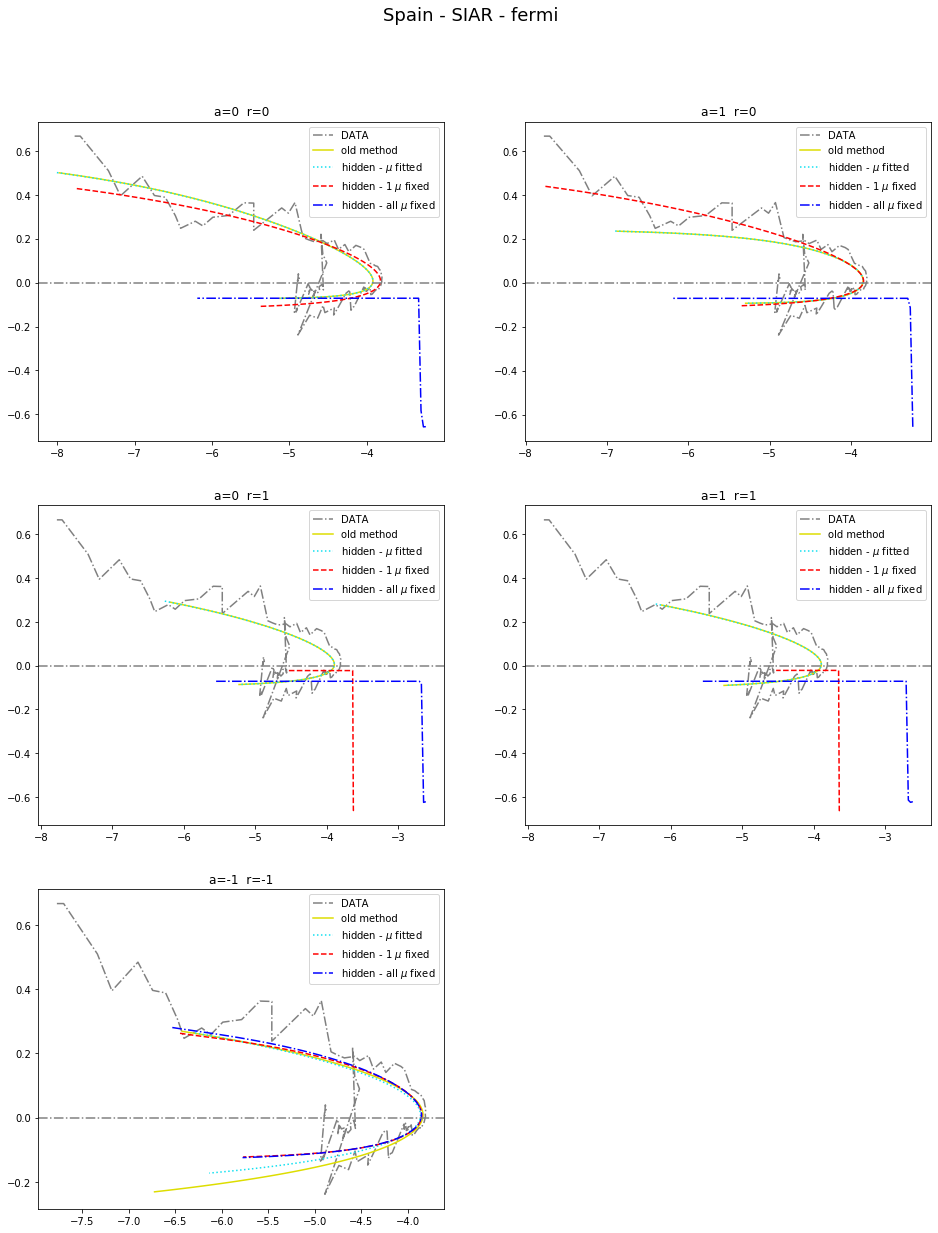

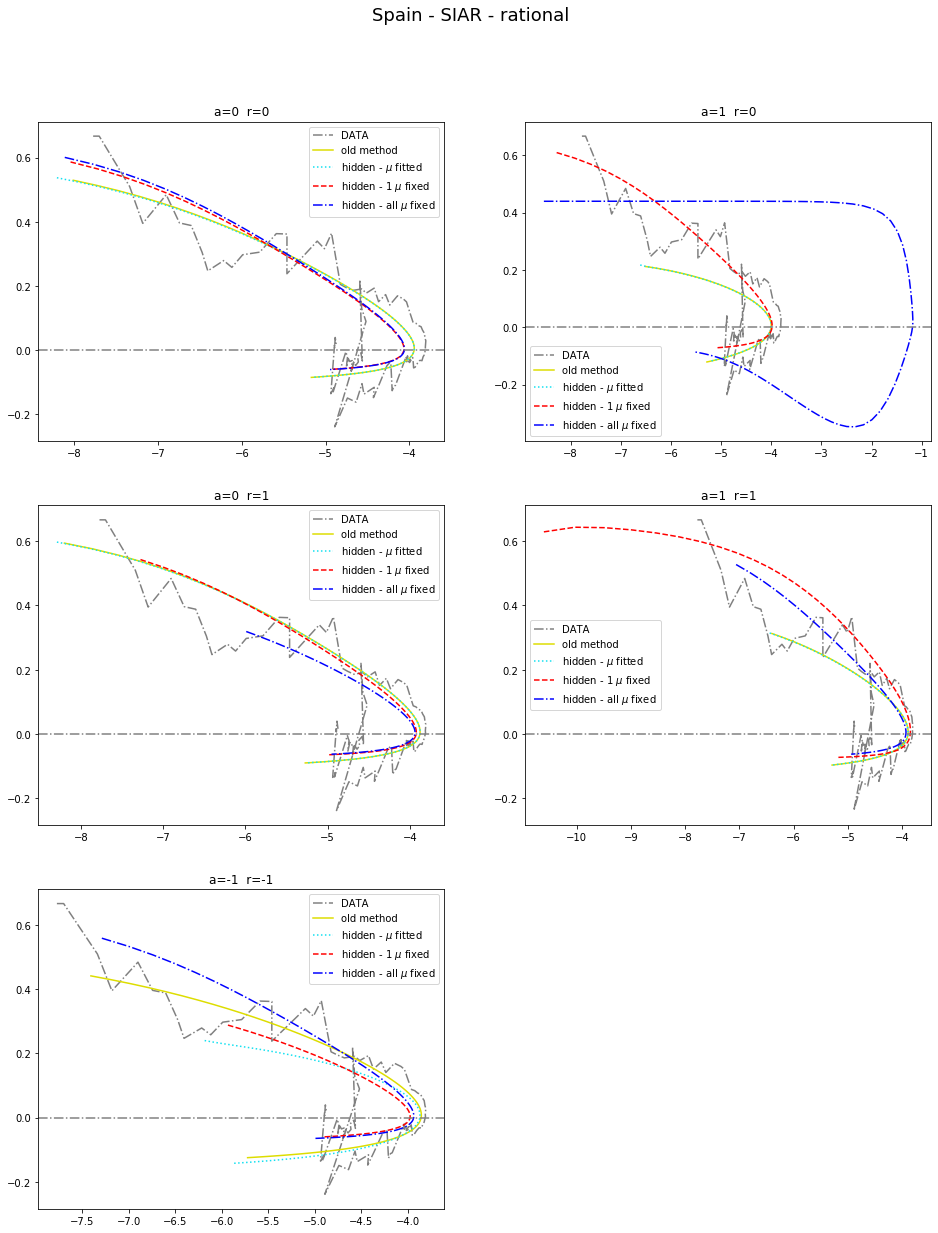

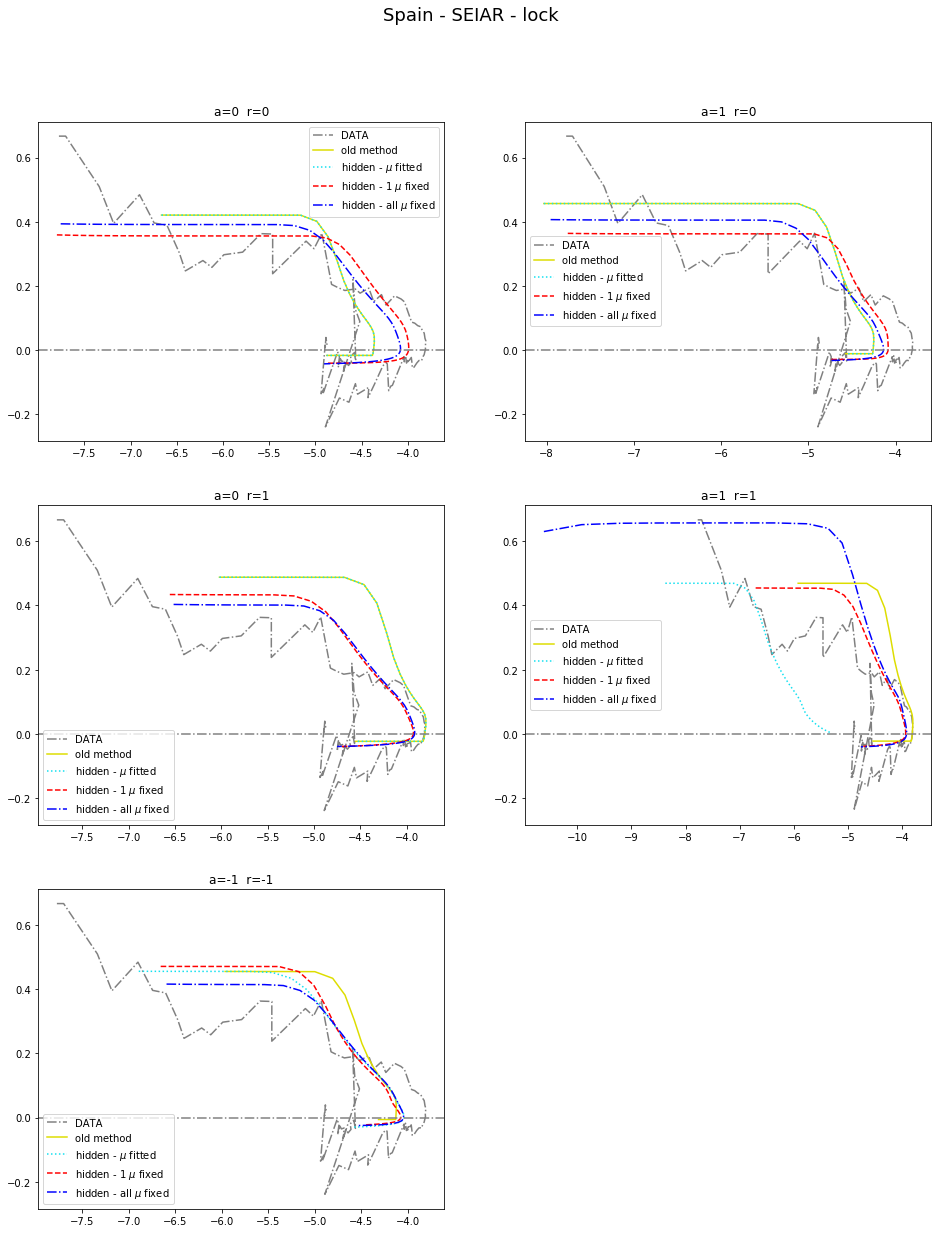

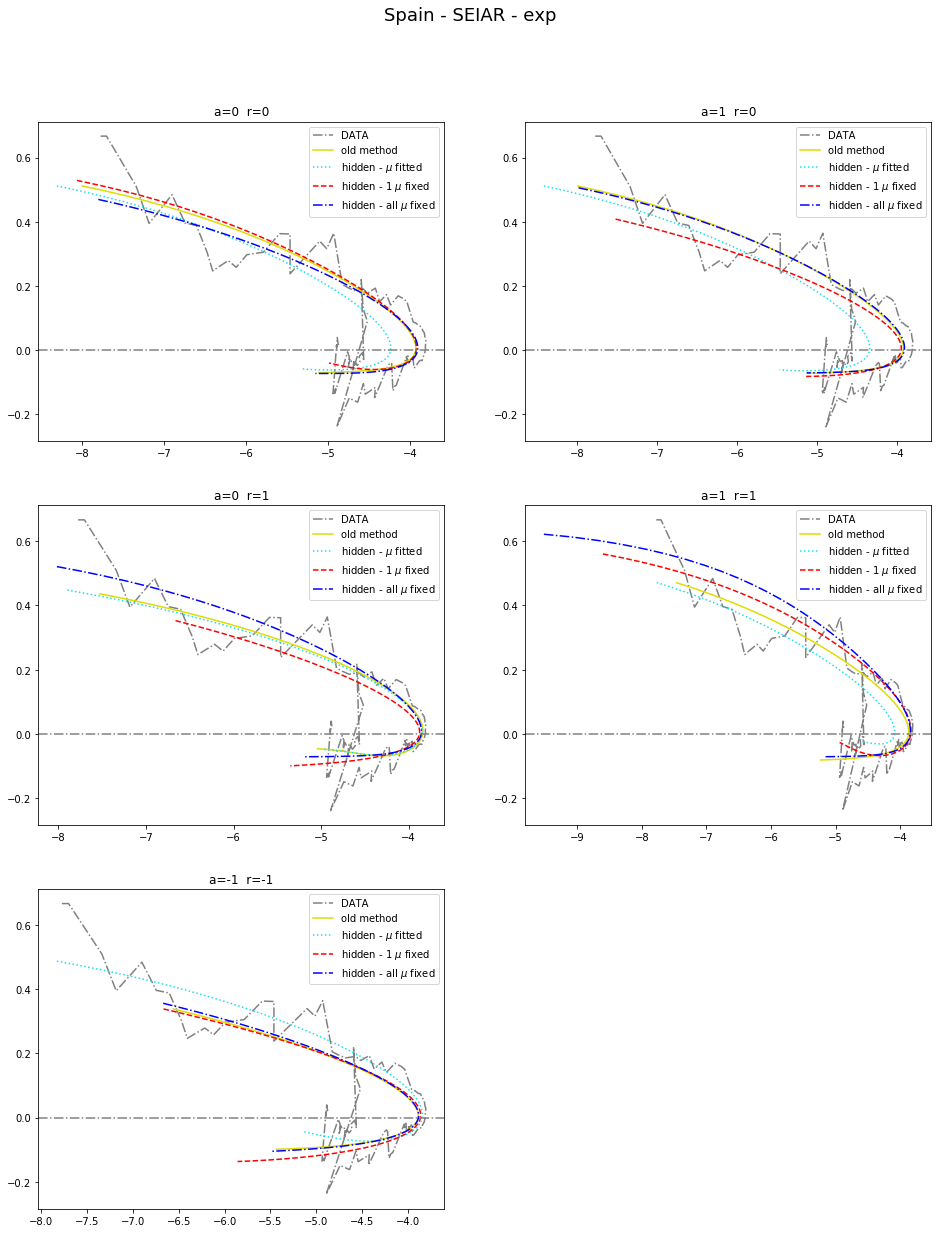

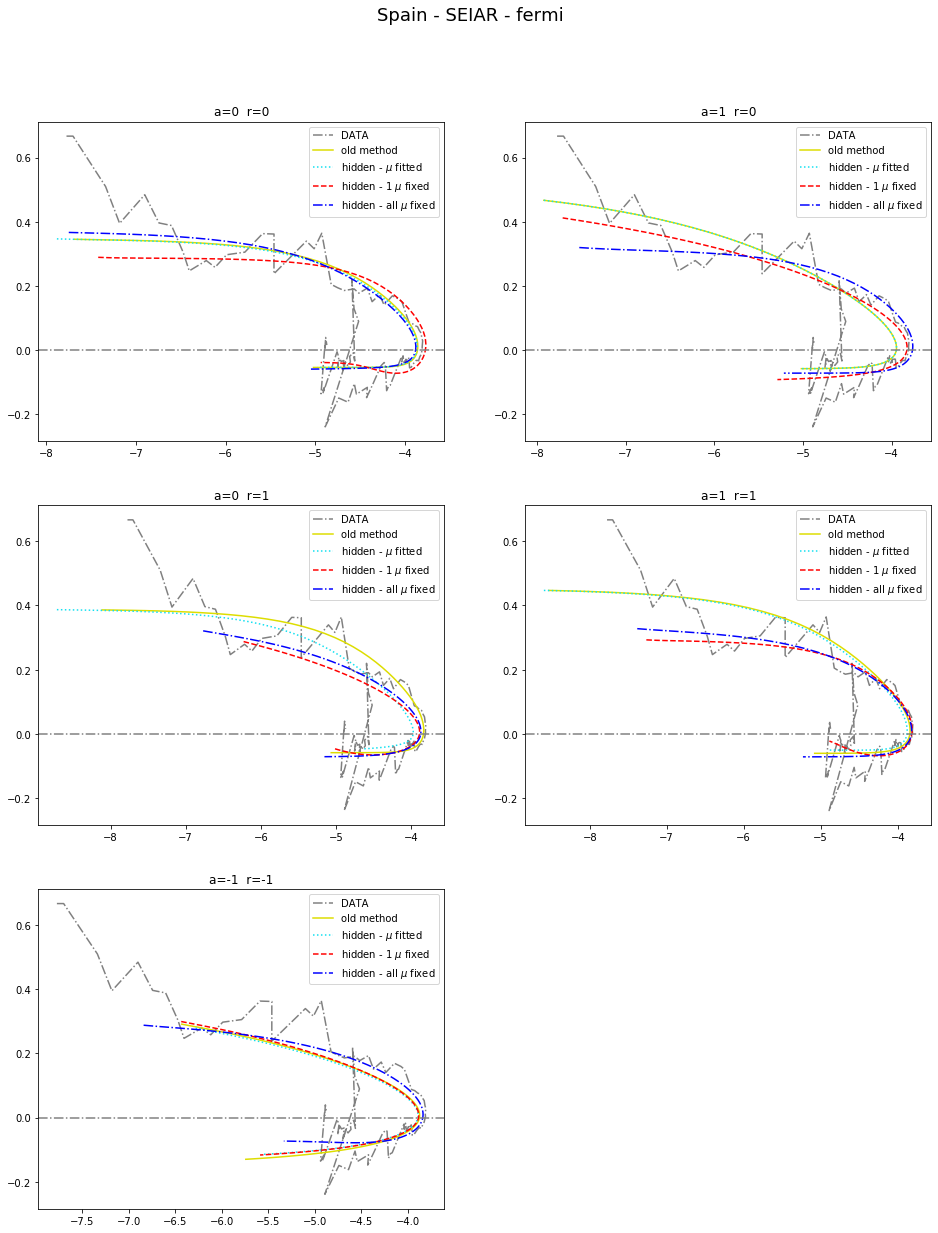

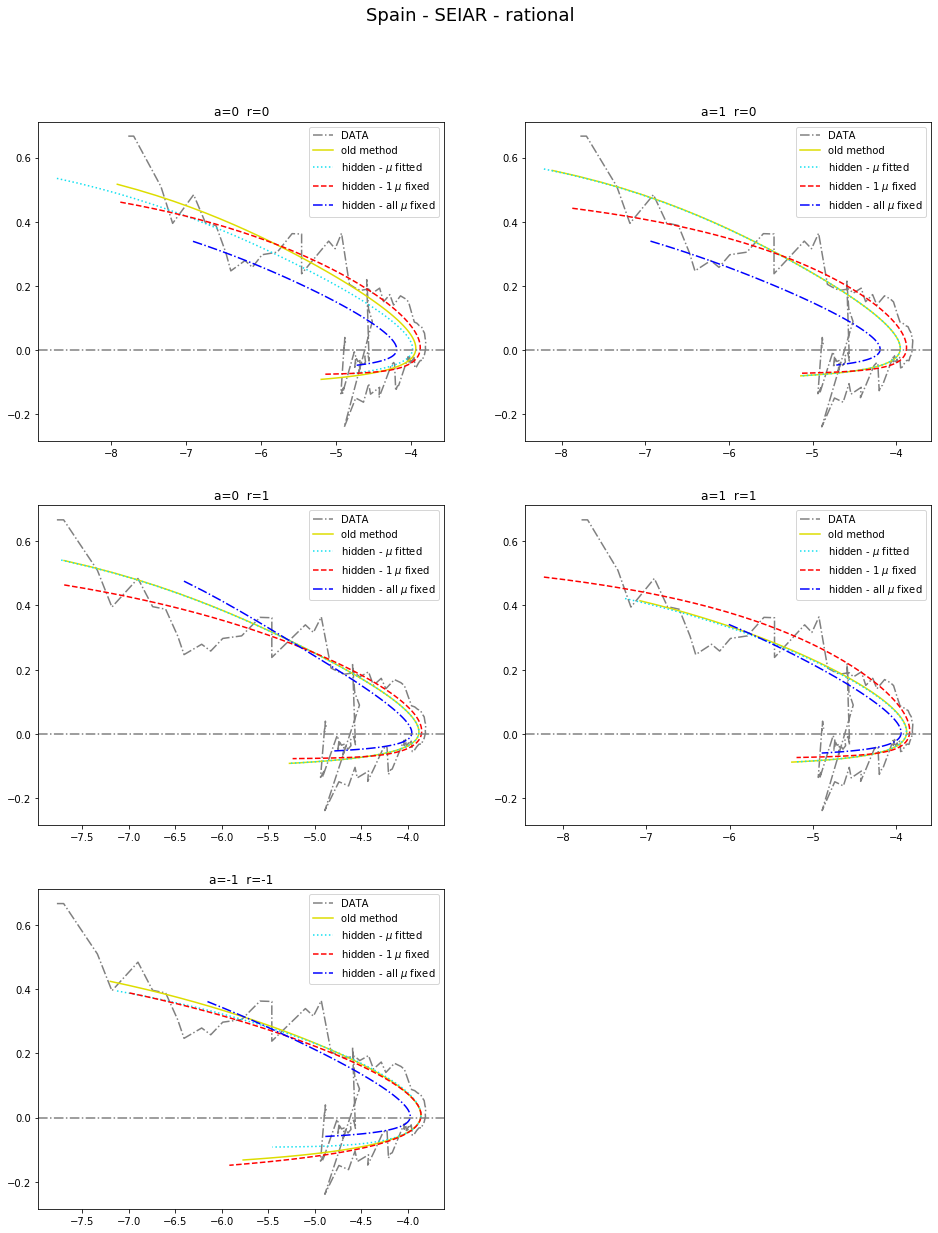

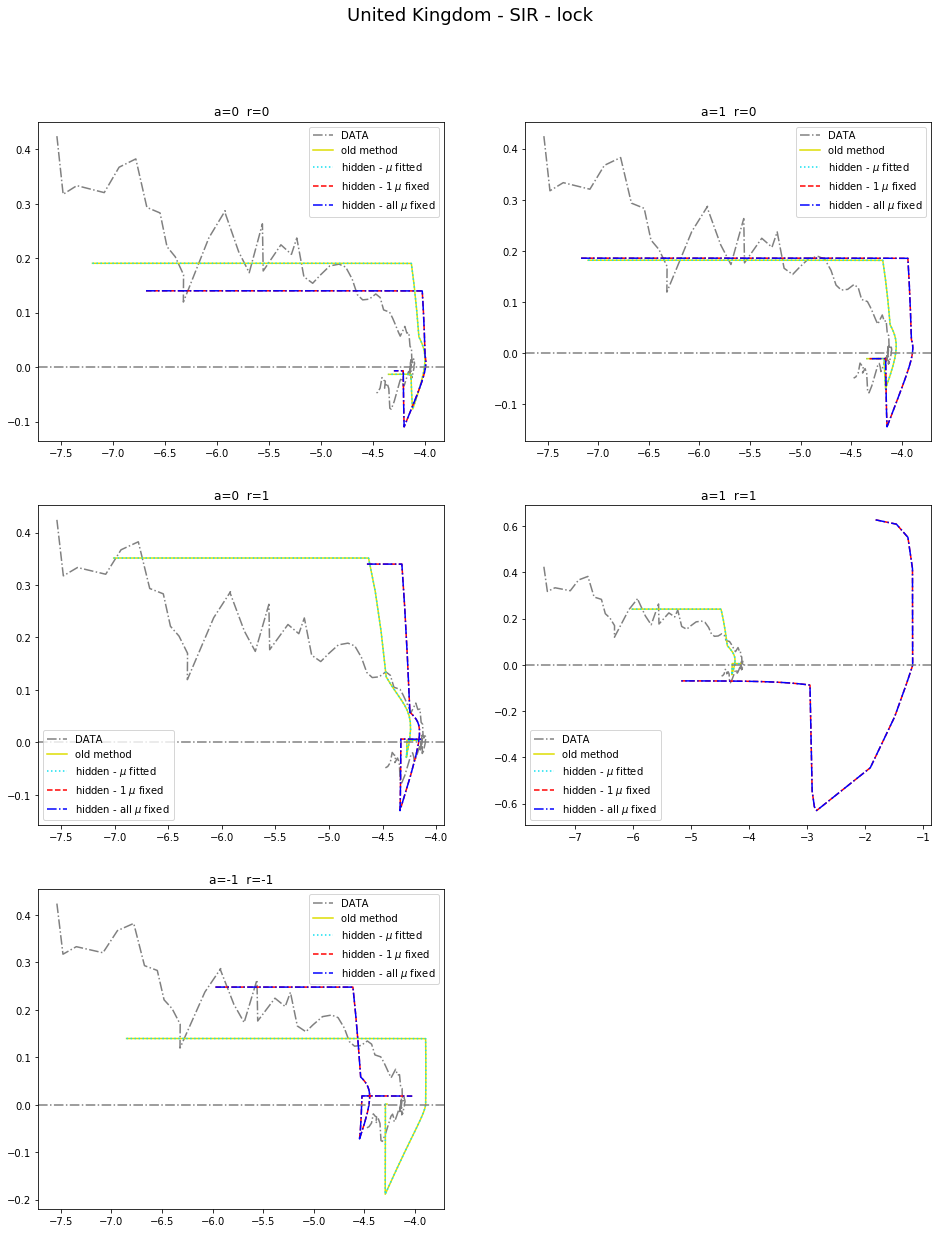

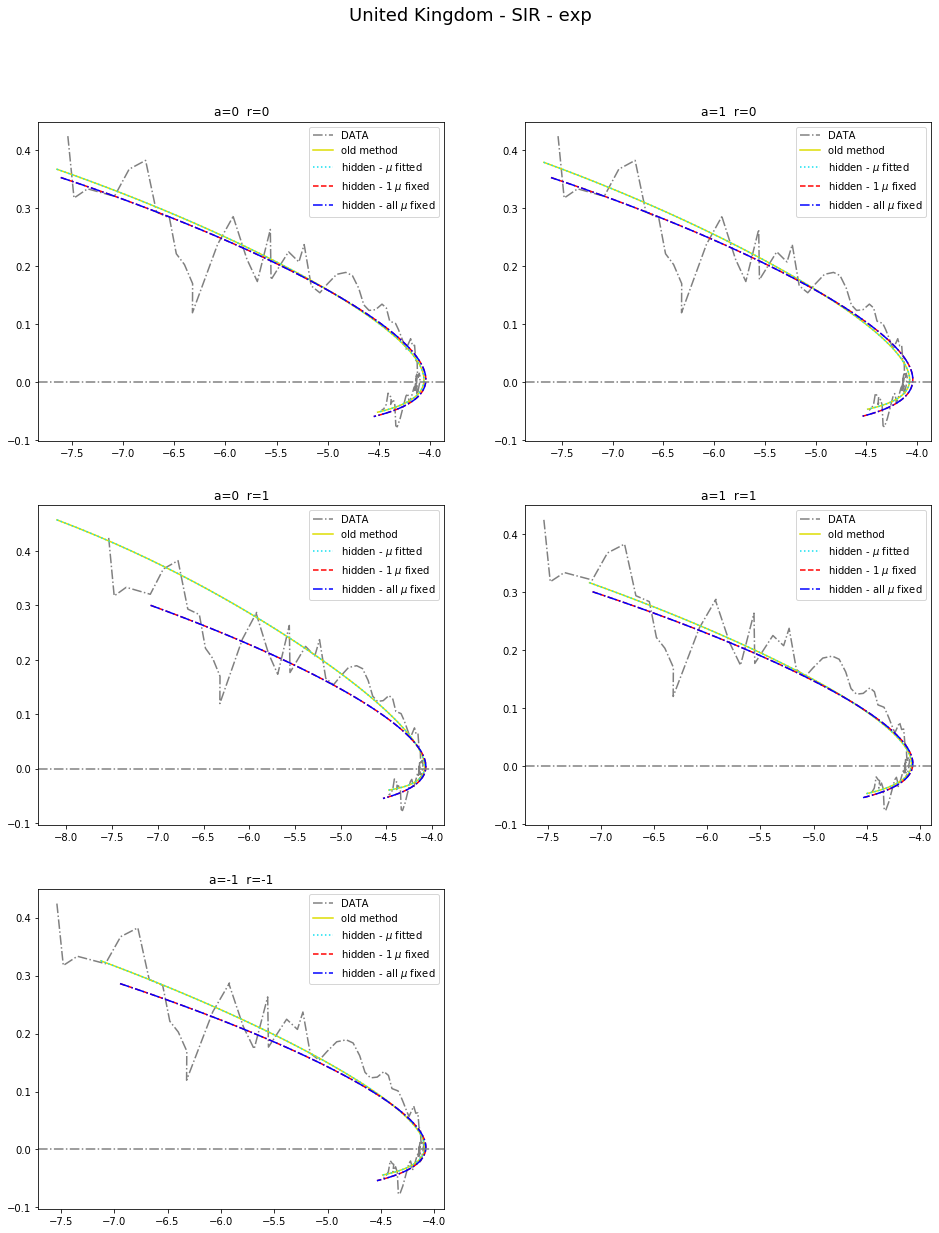

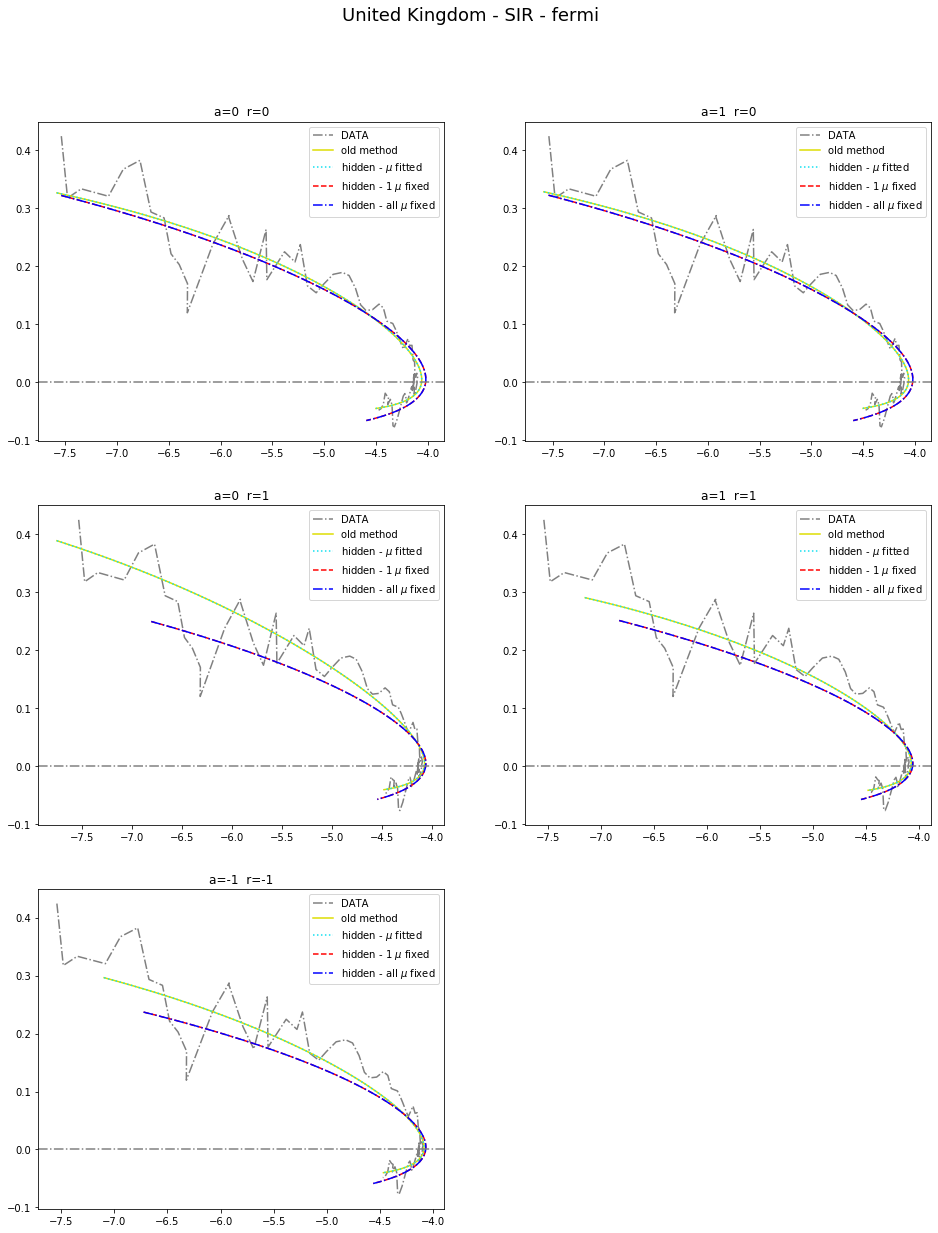

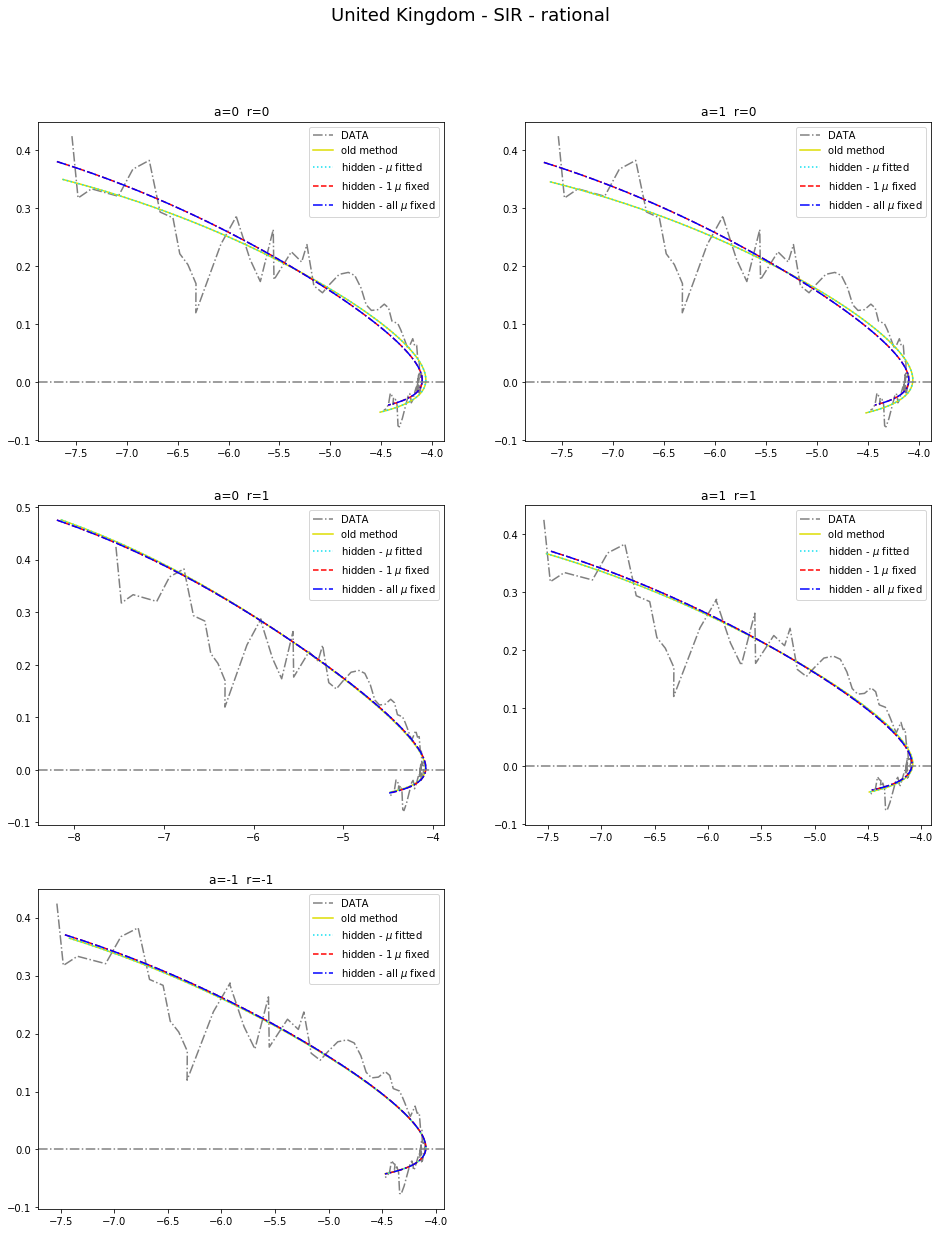

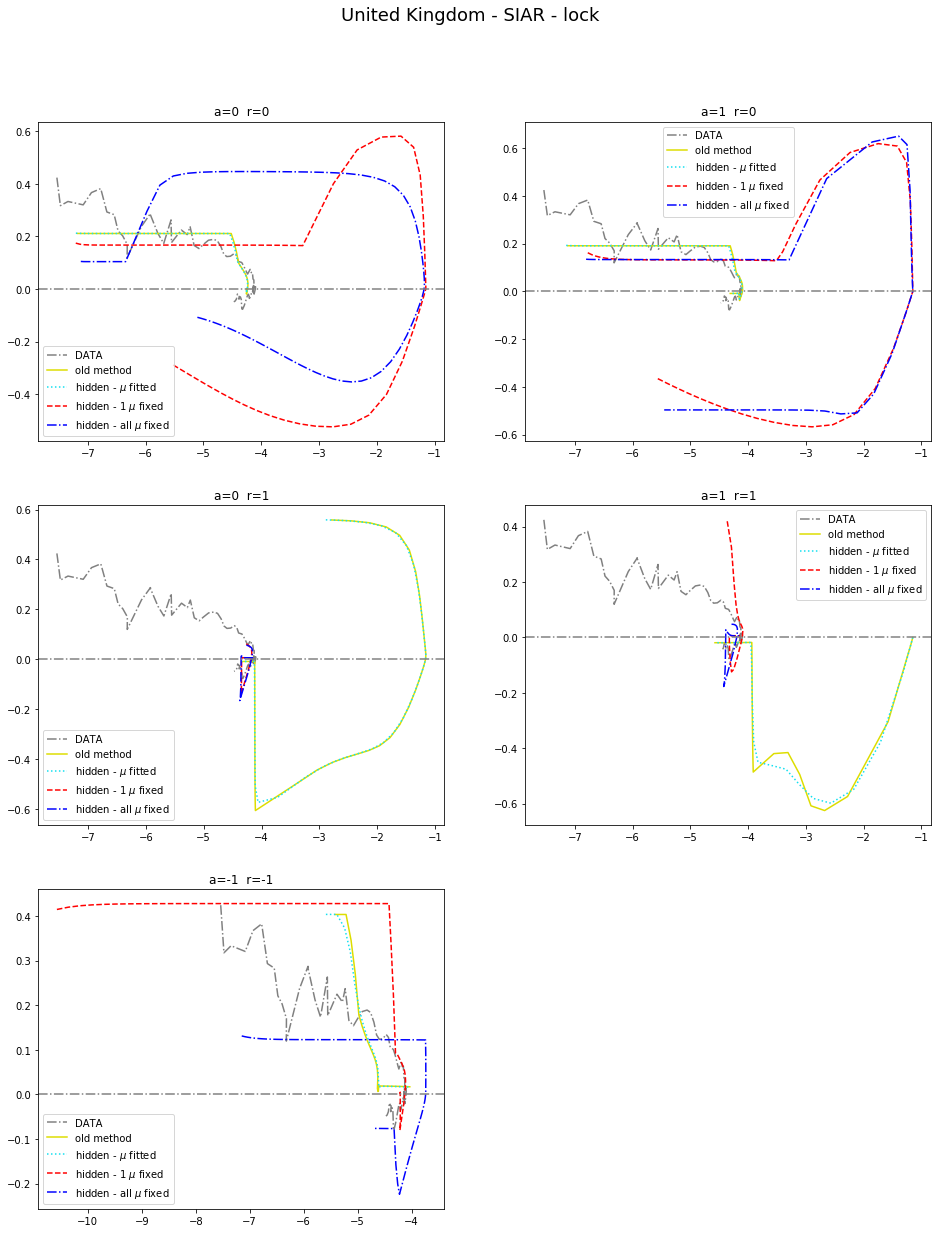

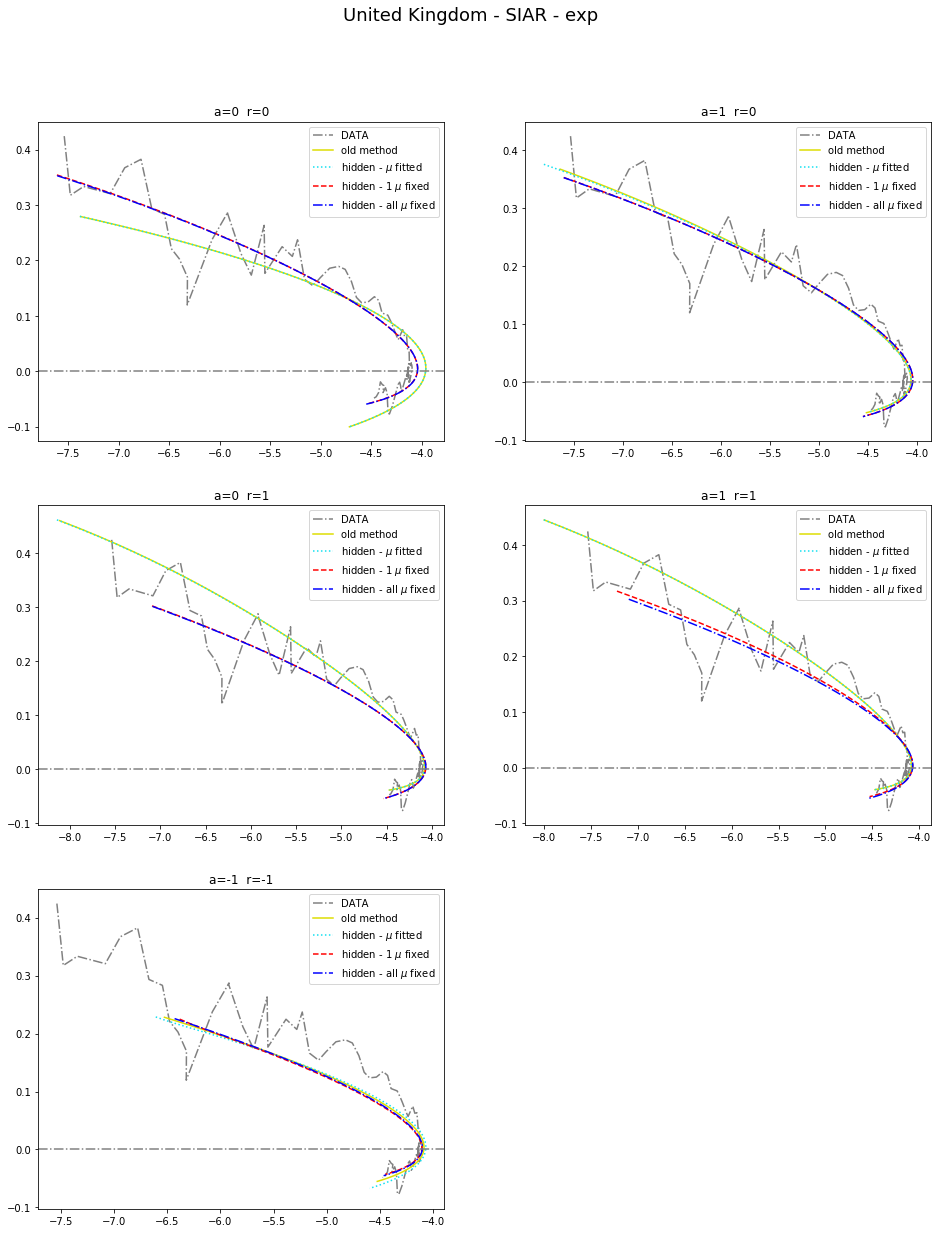

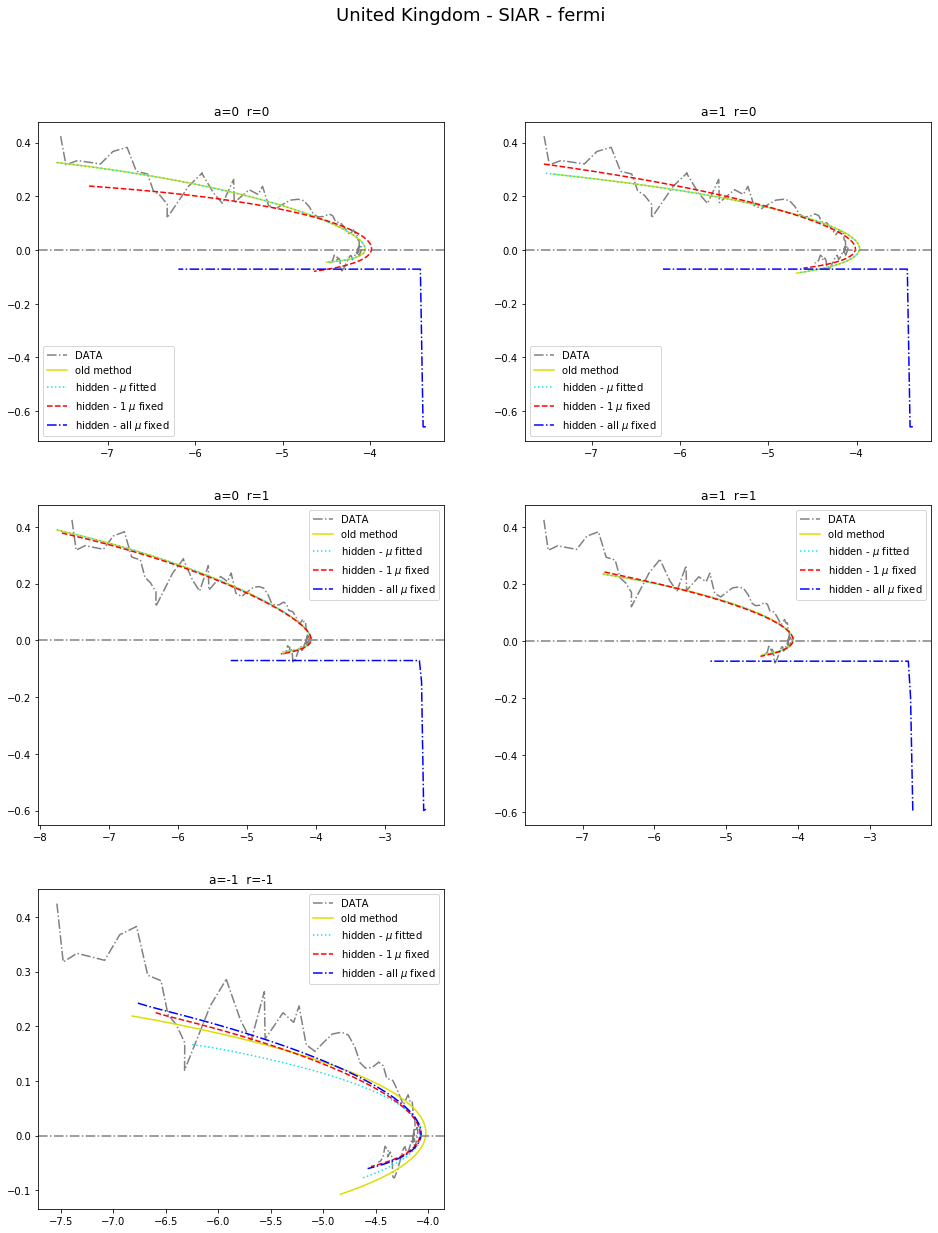

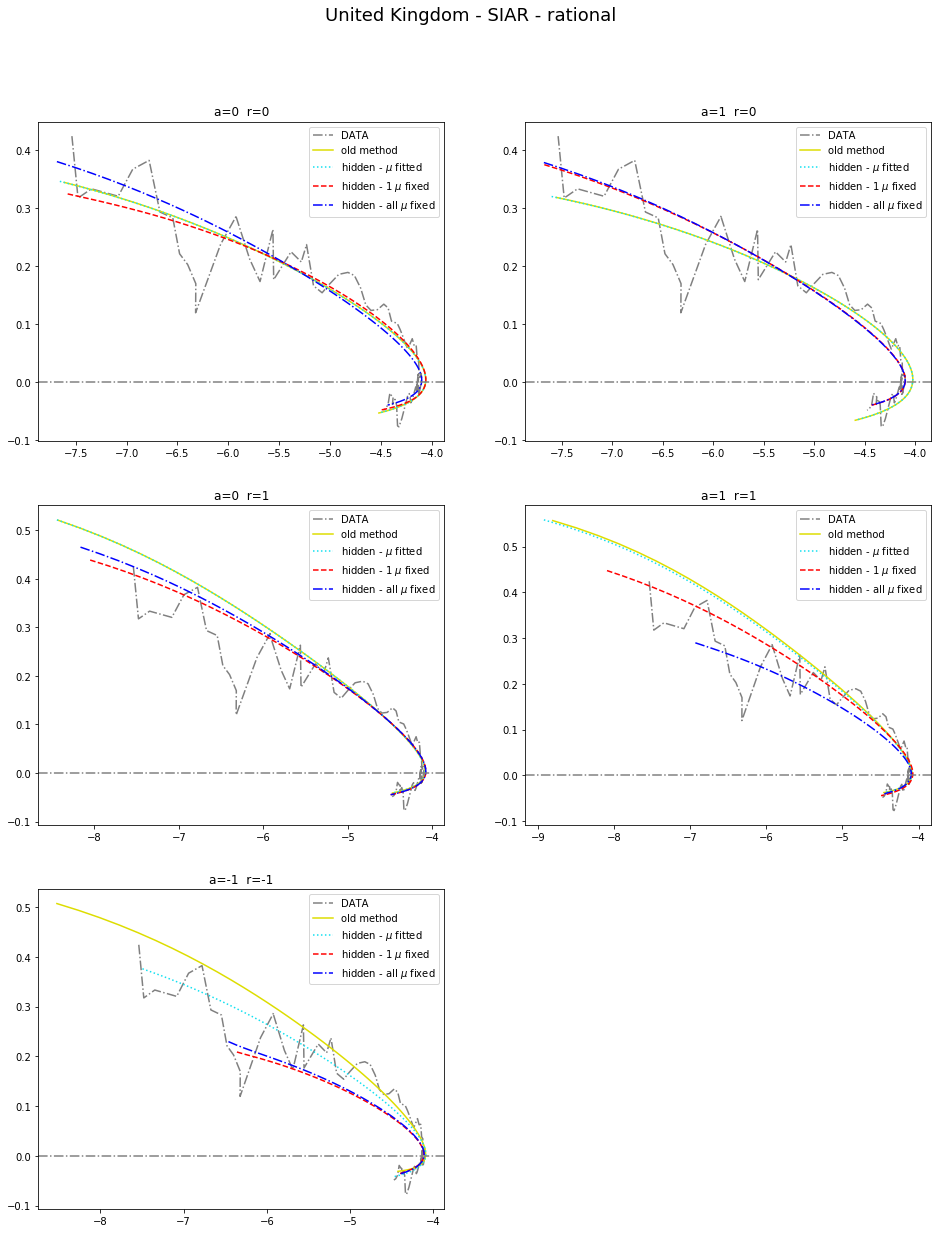

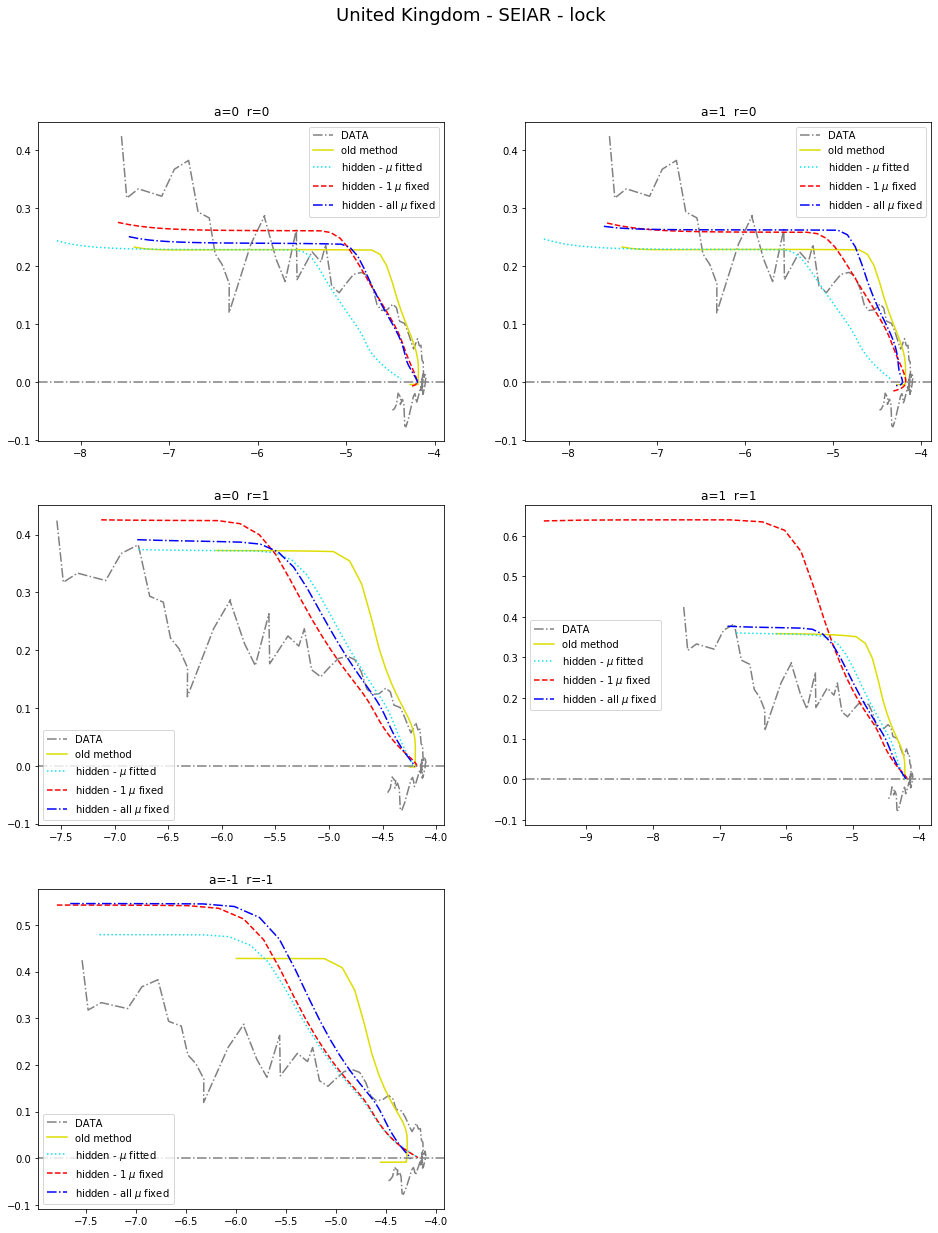

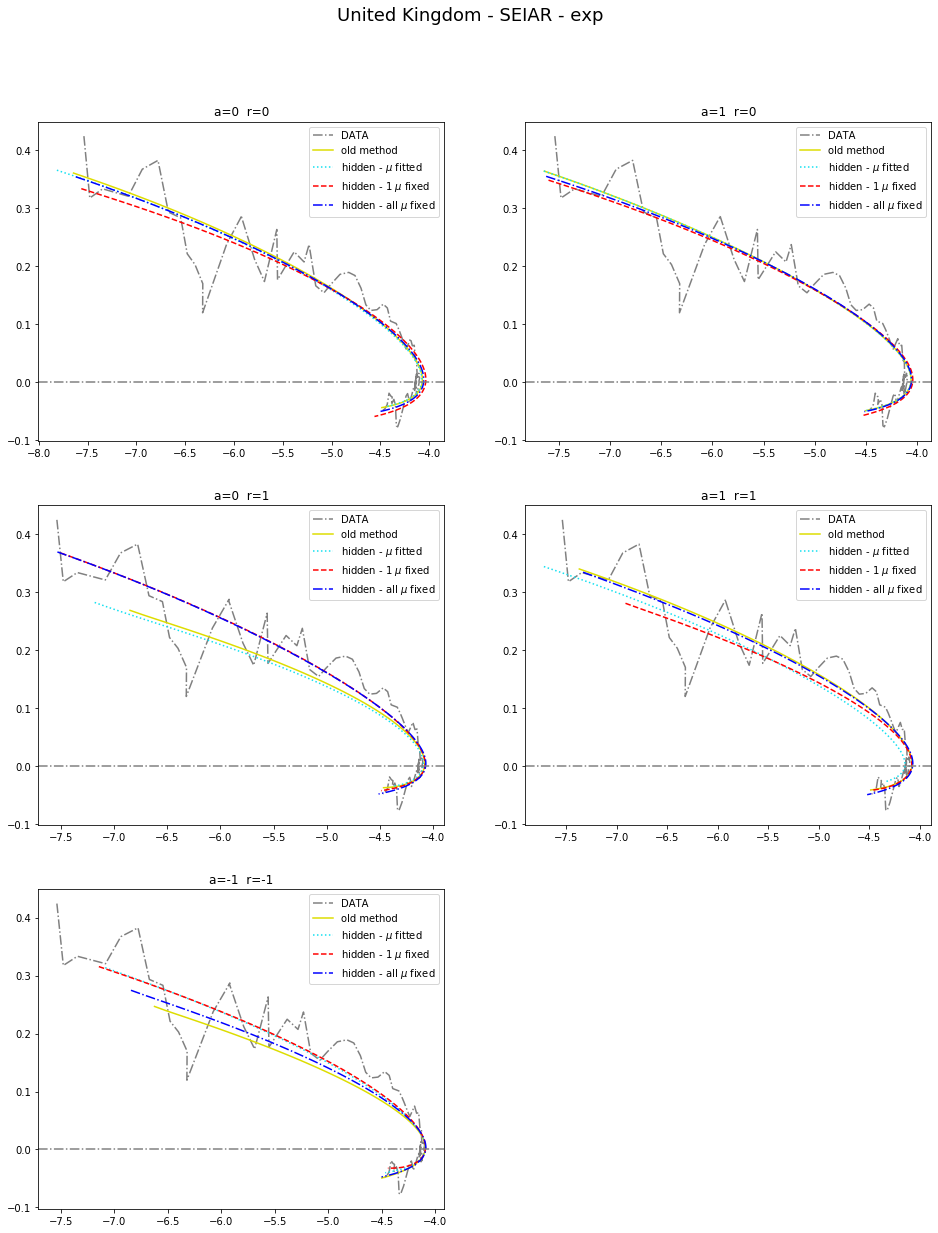

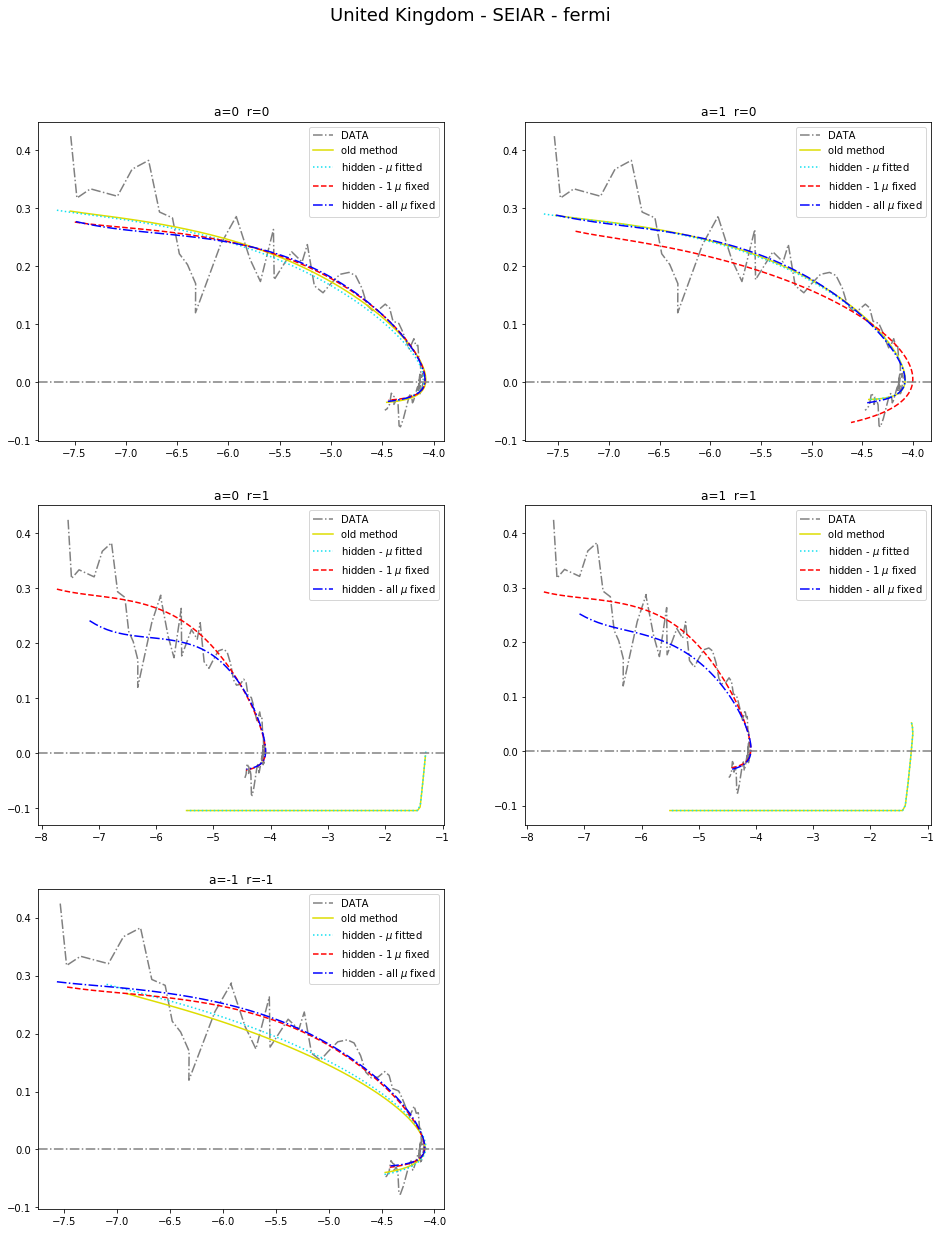

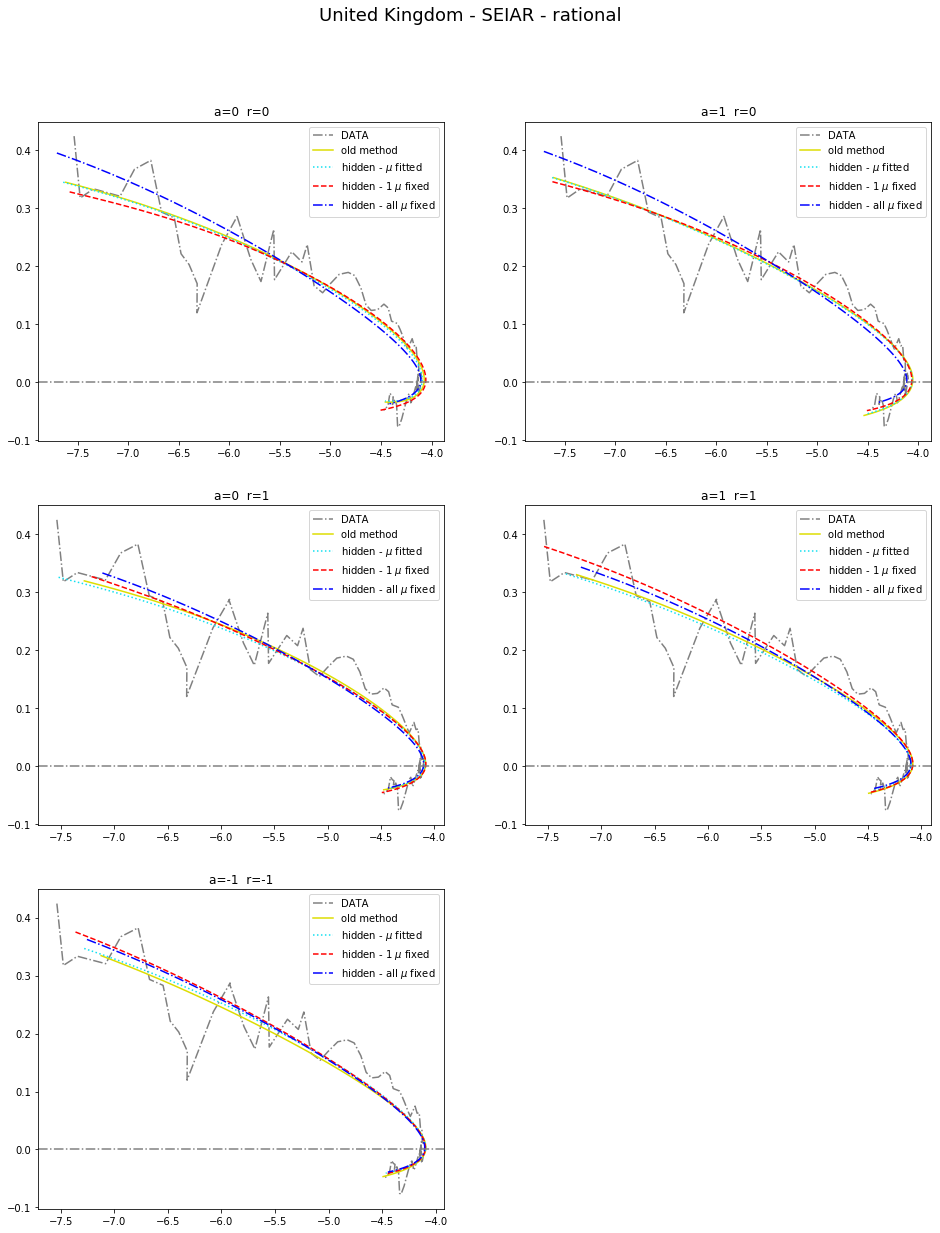

In [8]:
i = 0 #--> SIR
j = 0 #--> lock
for country in countries:
    for i, sirtype_string in enumerate(sirtype_strings):
        sirtype = sirtypes[i]
        p_disease=ps_disease[i]
        for j, time in enumerate(times):

            plt.figure(figsize=(16,20))
            for l,weight in enumerate(weights):
                plt.subplot(3,2,l+1)
                for k in range(4):
                    fname = sirtype_string + 's.csv'
                    path = tras[k][2]
                    csv = pd.read_csv(path+'/'+fname, index_col=0)
                    csv = csv[csv['country'] == country]
                    csv = csv[csv['time'] == time]
                    a_w, r_w = weight
                    csv = csv[csv['a'] == a_w]
                    csv = csv[csv['r'] == r_w]
                    #dataframe--> series
                    csv = csv.iloc[0][6:]
                    csv = csv.dropna()

                    #parameter names as required by models
                    pnames = p_disease + time_params[j]

                    #definite params
                    params = []
                    for pname in pnames:
                        if pname in csv.index:
                            params.append(csv[pname])
                        else:
                            params.append(1/14.) #if mu/mu_I/mu_A is not fitted, i.e. not in csv file.

                    #load model & predict
                    hidden=tras[k][0]
                    with suppress_stdout(): #Suppress the printing of Models()
                        mod = Model(country,sirtype,time=time,start=starts[c_index[country]], hidden=hidden, download=download)
                    v_data, a_data = mod.v_data, mod.a_data
                    v,a = mod.predict(params)

                    #plot
                    label=tras[k][1]; col=tras[k][3]; style=tras[k][4]
                    if k==0: plt.plot(v_data, a_data, '-.',color='grey',label='DATA')
                    plt.plot(v,a, color=col, linestyle=style,label=label)

                plt.axhline(y=0, color='gray', linestyle='-.')
                plt.title('a='+str(int(a_w))+'  r='+str(int(r_w)))
                plt.legend()
            plt.suptitle(country+' - ' + sirtype_string+ ' - '+ time, y=0.96, size=18)
            plt.show()
            print('')
            print('')
            print('')